In [1]:
import warnings 
import numpy as np
import pandas as pd
from numpy import array 
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid
pd.plotting.register_matplotlib_converters()
warnings.filterwarnings("ignore")
import logging 
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absoulte_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_true)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

Time Series Analysis


Seasonality analysis
The seasonality patterns can be explored in detail by using boxplots. Seasonality is clearly confirmed for the categories of R03, R06 and N02BE. Some additional conclusions: R03 and N05C has more outliers that the others, indicating that their sales is more difficult to predict.



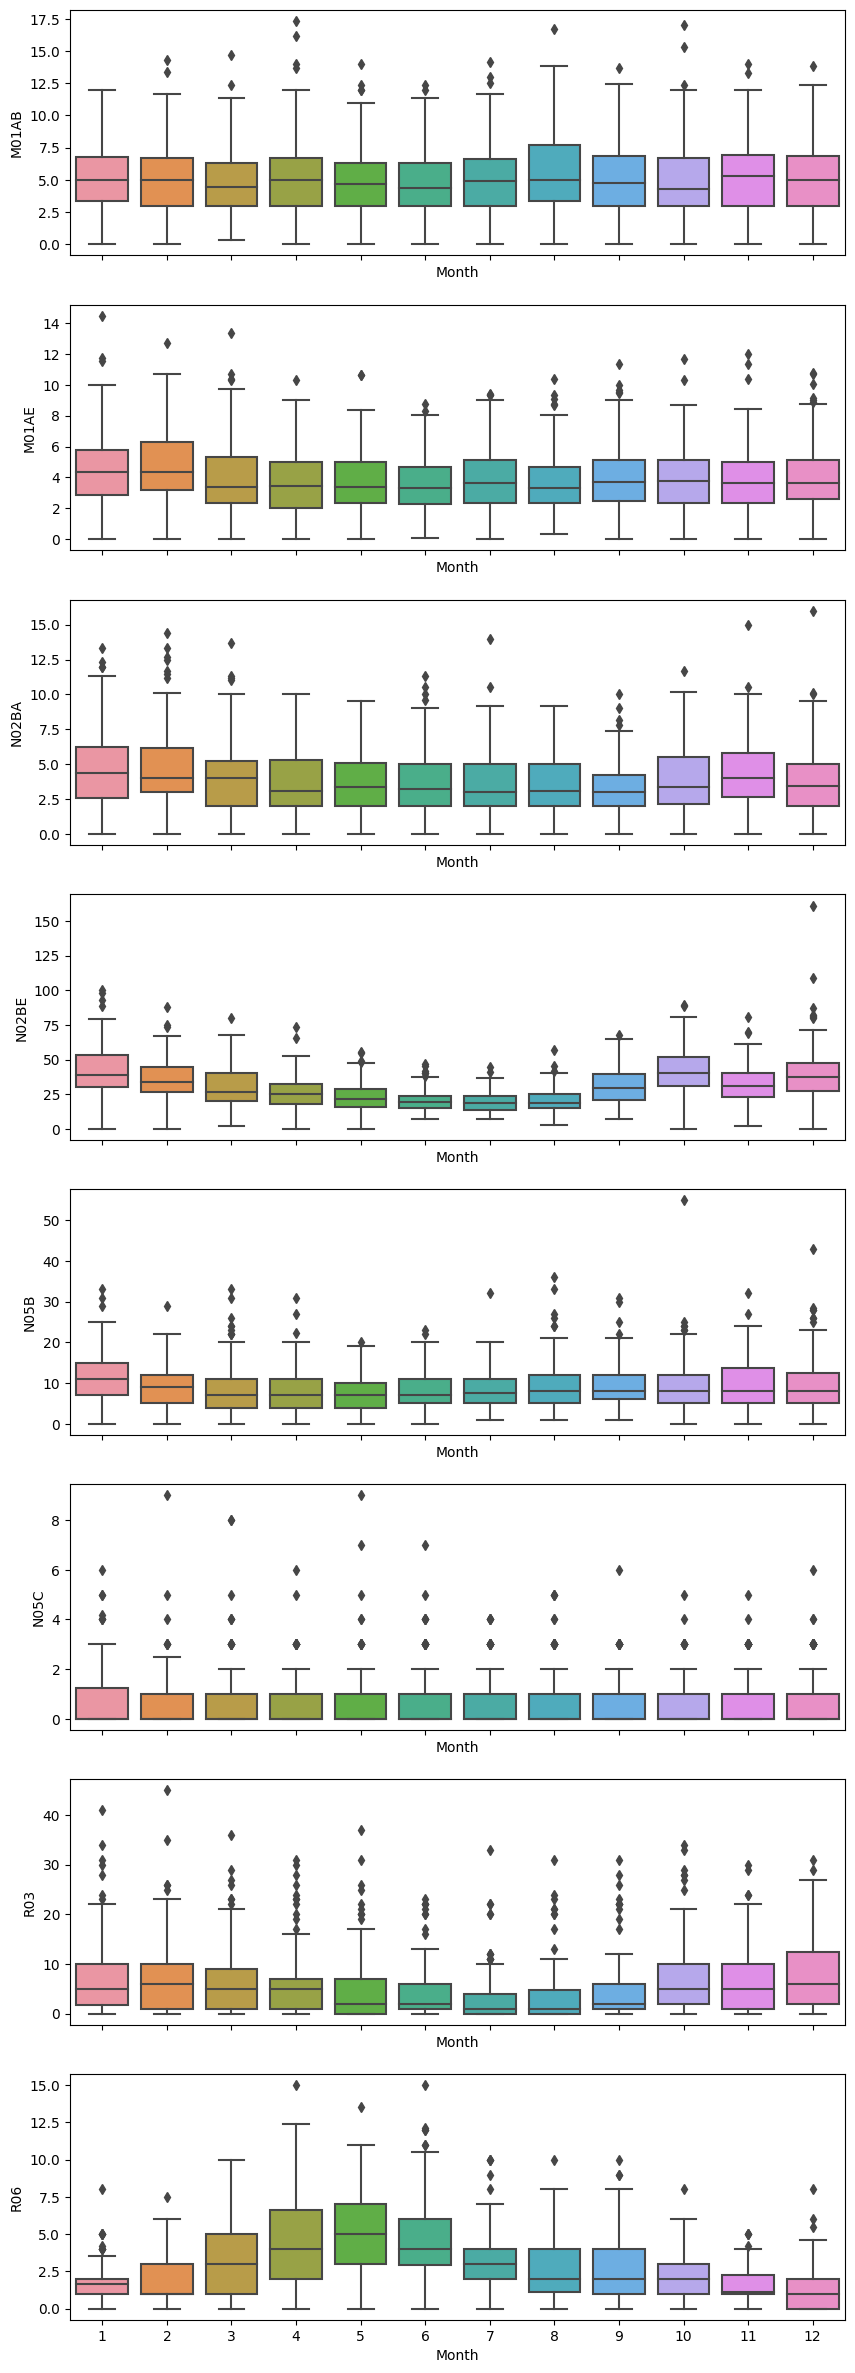

In [2]:
import seaborn as sns
dfcat_daily=pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesdaily.csv")
fig,axes=plt.subplots(8,1,figsize=(10,30),sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06'],axes):
    sns.boxplot(data=dfcat_daily,x='Month',y=name,ax=ax)

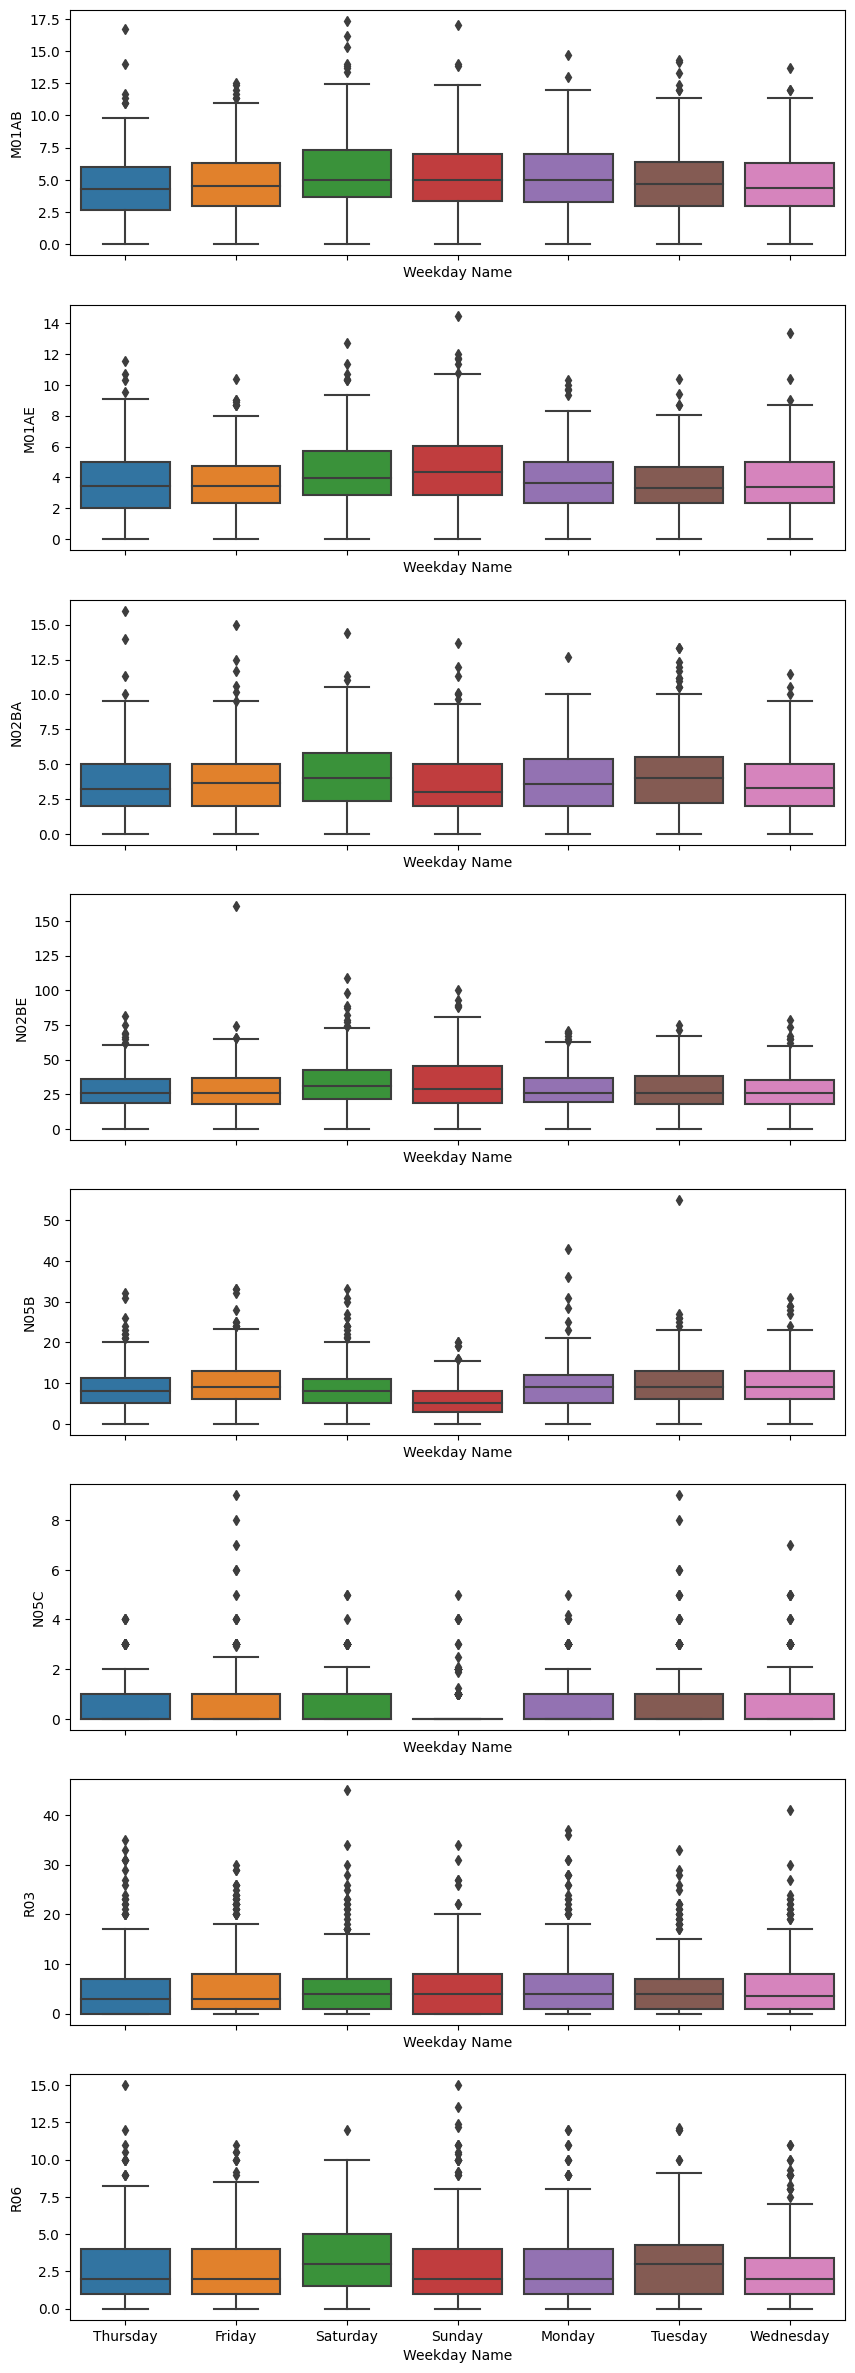

In [3]:
fig,axes=plt.subplots(8,1,figsize=(10,30),sharex=True)
for name ,ax in zip(['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06'],axes):
    sns.boxplot(data=dfcat_daily,x='Weekday Name',y=name,ax=ax)

visualization that can be useful for discovering seasonality patterns is related to rolling window means. Analysis below shows 30-day and 365-day rolling mean and 30-day rolling standard deviation of sales data.

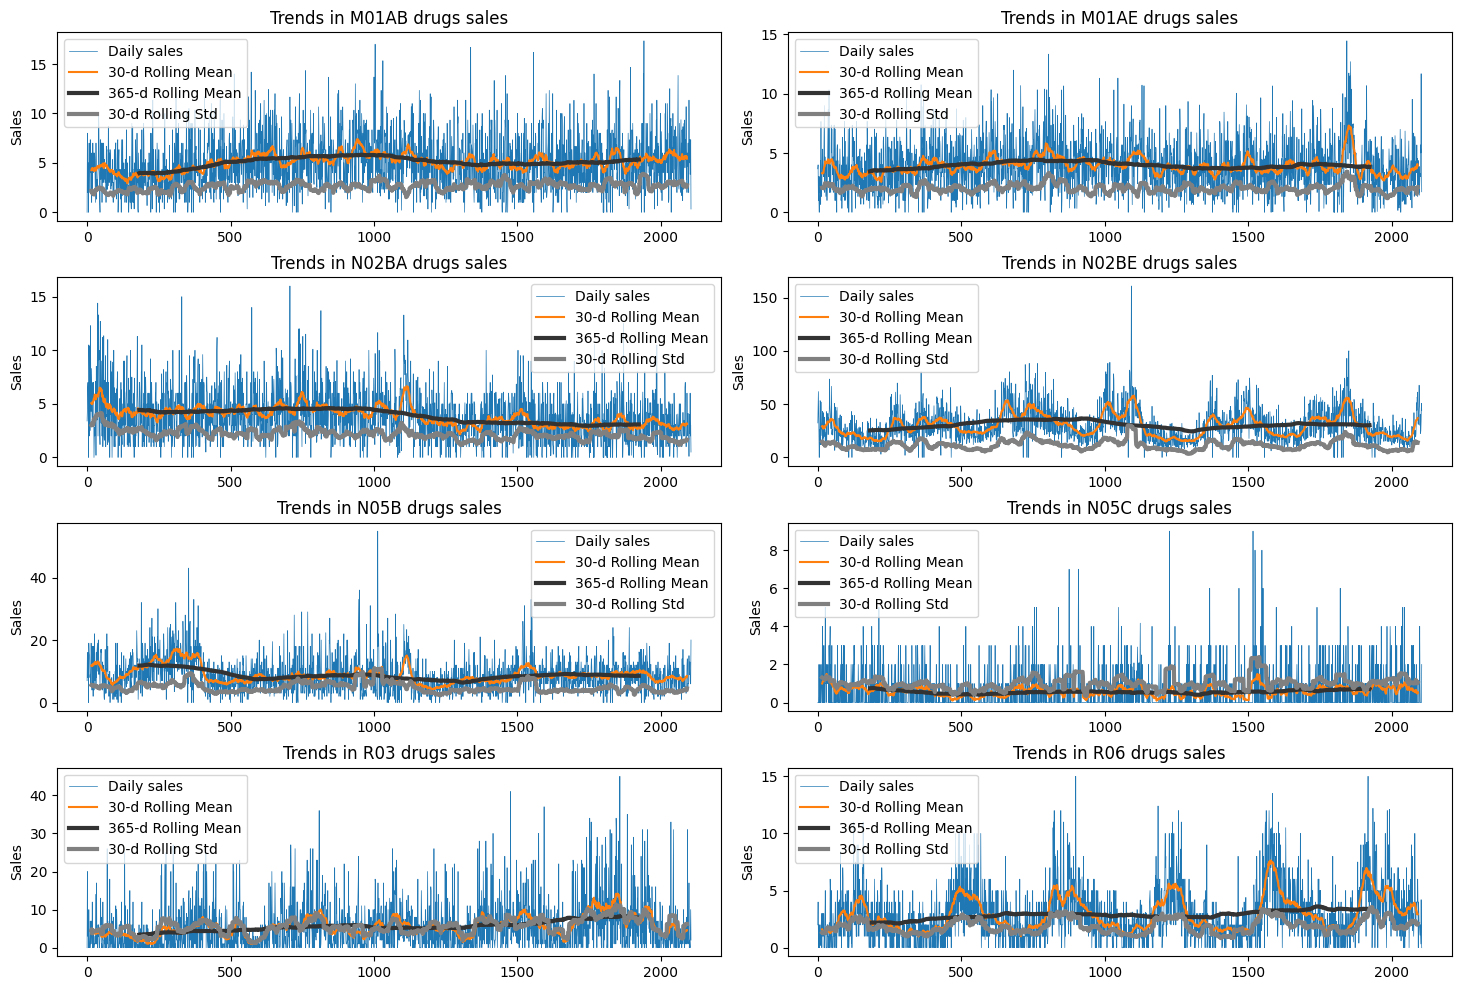

In [4]:
dfatc_daily=pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesdaily.csv")
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = dfatc_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = dfatc_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = dfatc_daily[cols_plot].rolling(30, center=True).std()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(dfatc_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');   
    subplotindex=subplotindex+1
plt.show()


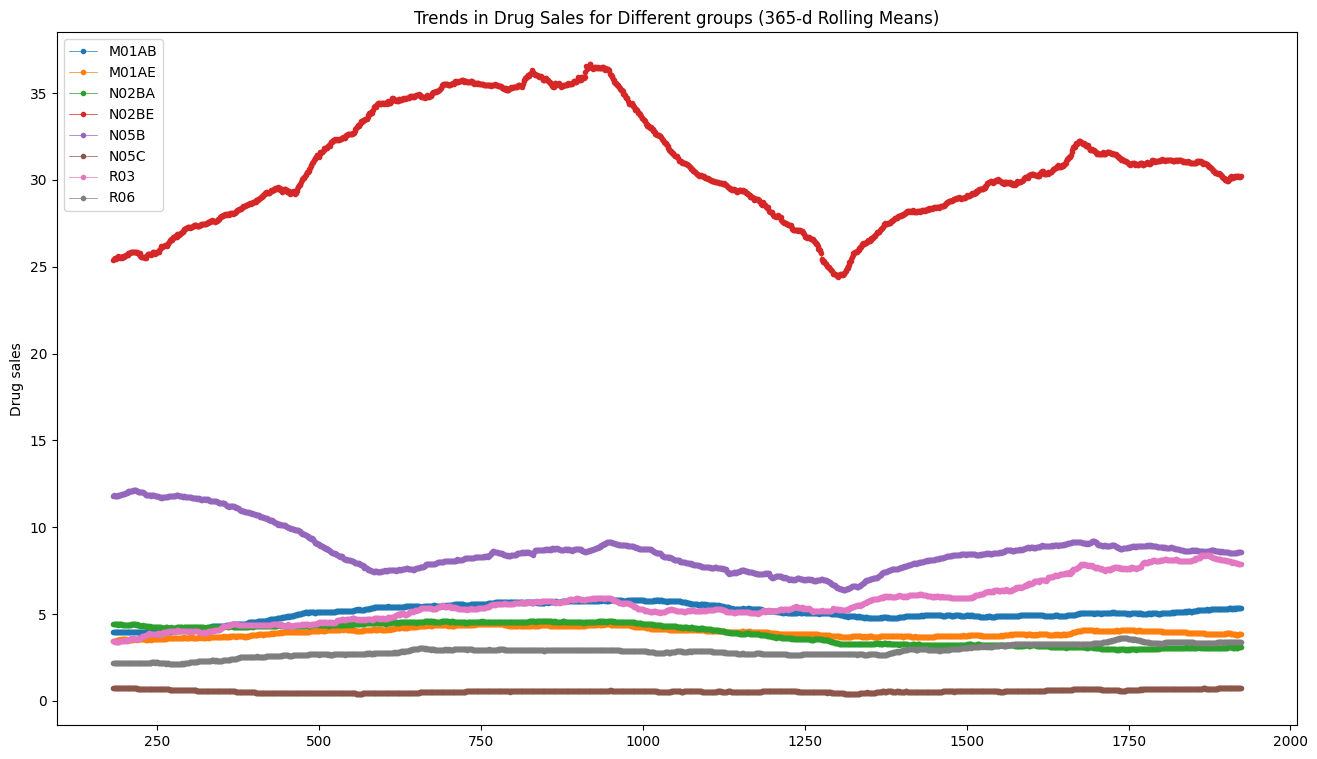

In [5]:
fig ,ax=plt.subplots(figsize=(16,9))
for nm in cols_plot:
    ax.plot(dfatc_365d[nm],label=nm,marker='.',linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for Different groups (365-d Rolling Means)');

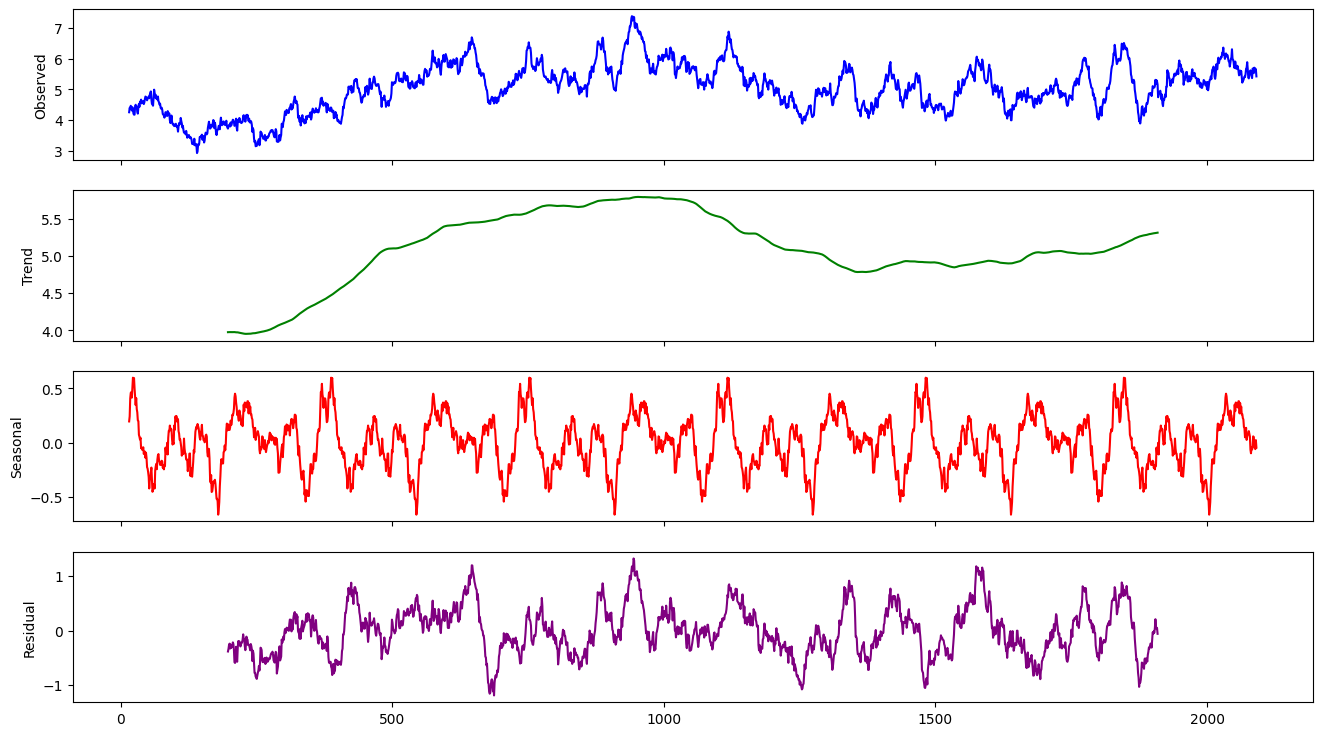

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(dfatc_daily['M01AB'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'blue'),
              ('Trend', result.trend, 'green'),
              ('Seasonal', result.seasonal, 'red'),
              ('Residual', result.resid, 'purple')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()


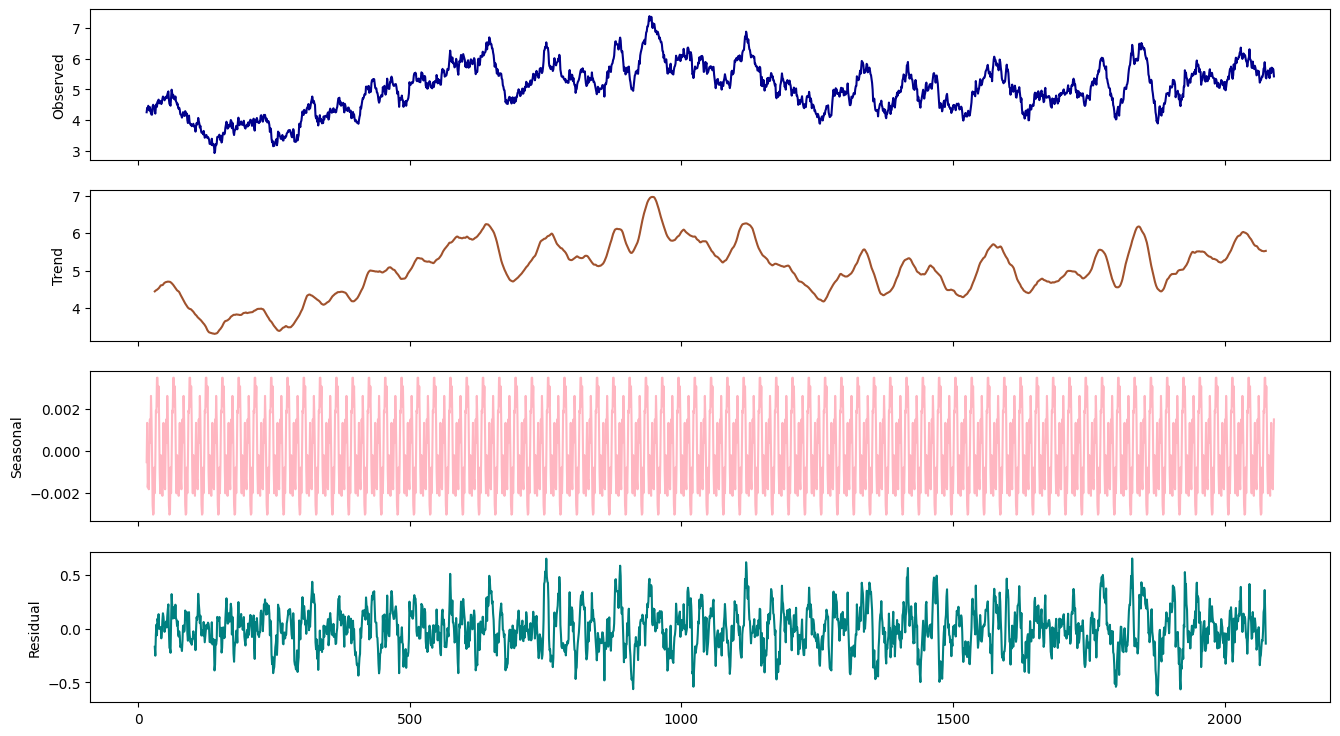

In [7]:
result = seasonal_decompose(dfatc_daily['M01AB'].rolling(30, center=True).mean().dropna(), period=30)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'darkblue'),
              ('Trend', result.trend, 'sienna'),
              ('Seasonal', result.seasonal, 'lightpink'),
              ('Residual', result.resid, 'teal')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

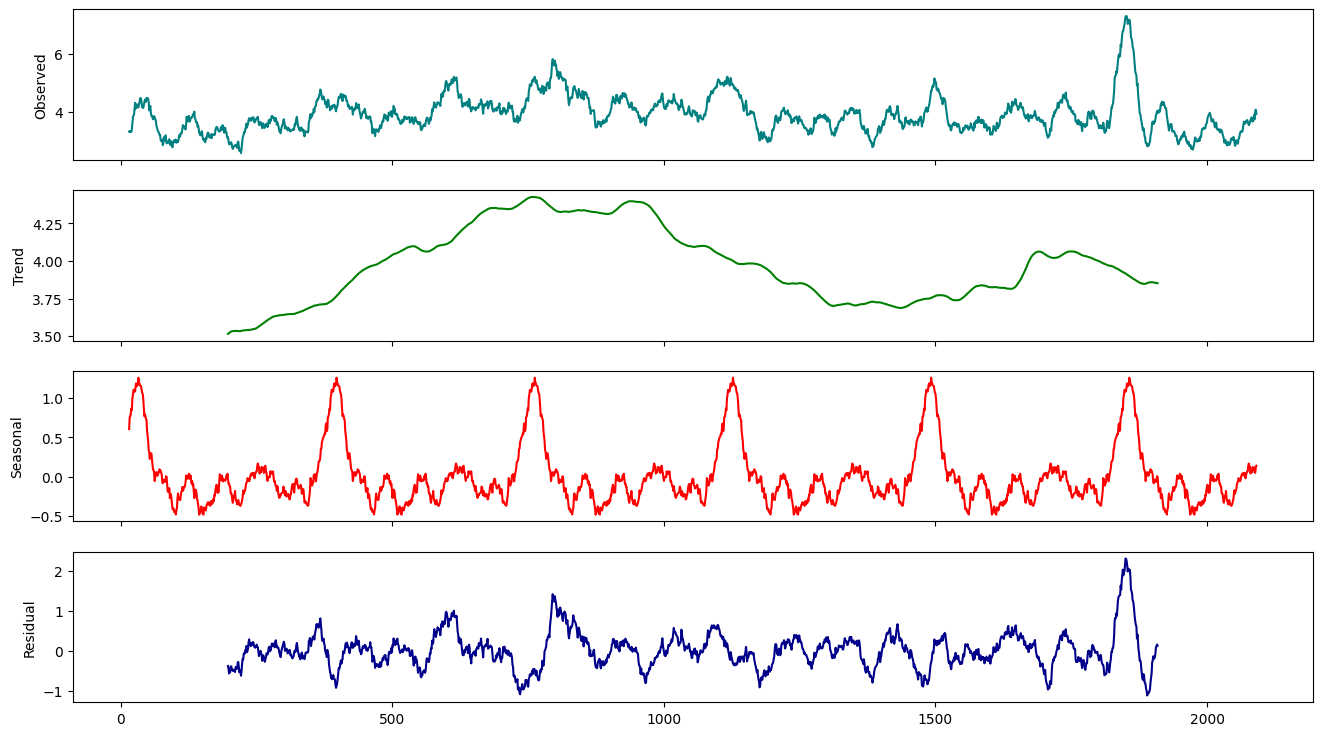

In [8]:
result = seasonal_decompose(dfatc_daily['M01AE'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'teal'),
              ('Trend', result.trend, 'green'),
              ('Seasonal', result.seasonal, 'red'),
              ('Residual', result.resid, 'darkblue')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

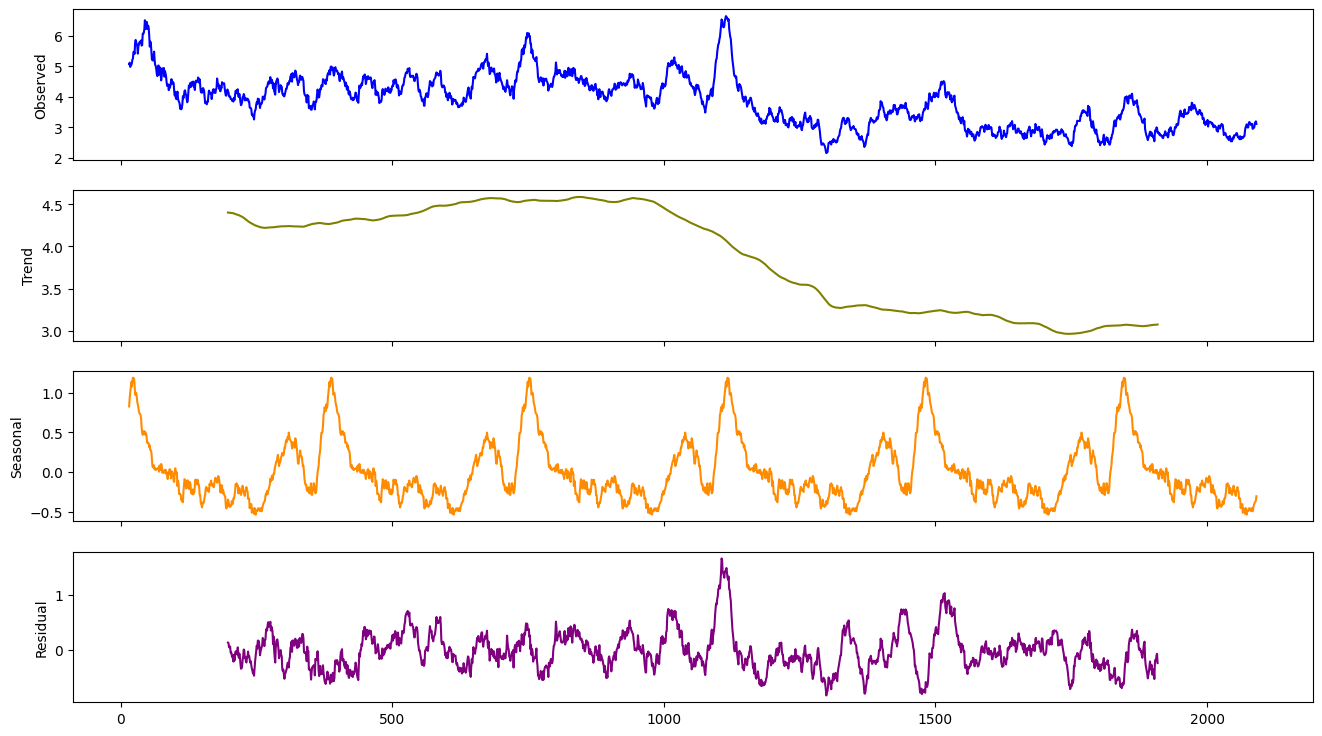

In [9]:
result = seasonal_decompose(dfatc_daily['N02BA'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'blue'),
              ('Trend', result.trend, 'olive'),
              ('Seasonal', result.seasonal, 'darkorange'),
              ('Residual', result.resid, 'purple')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

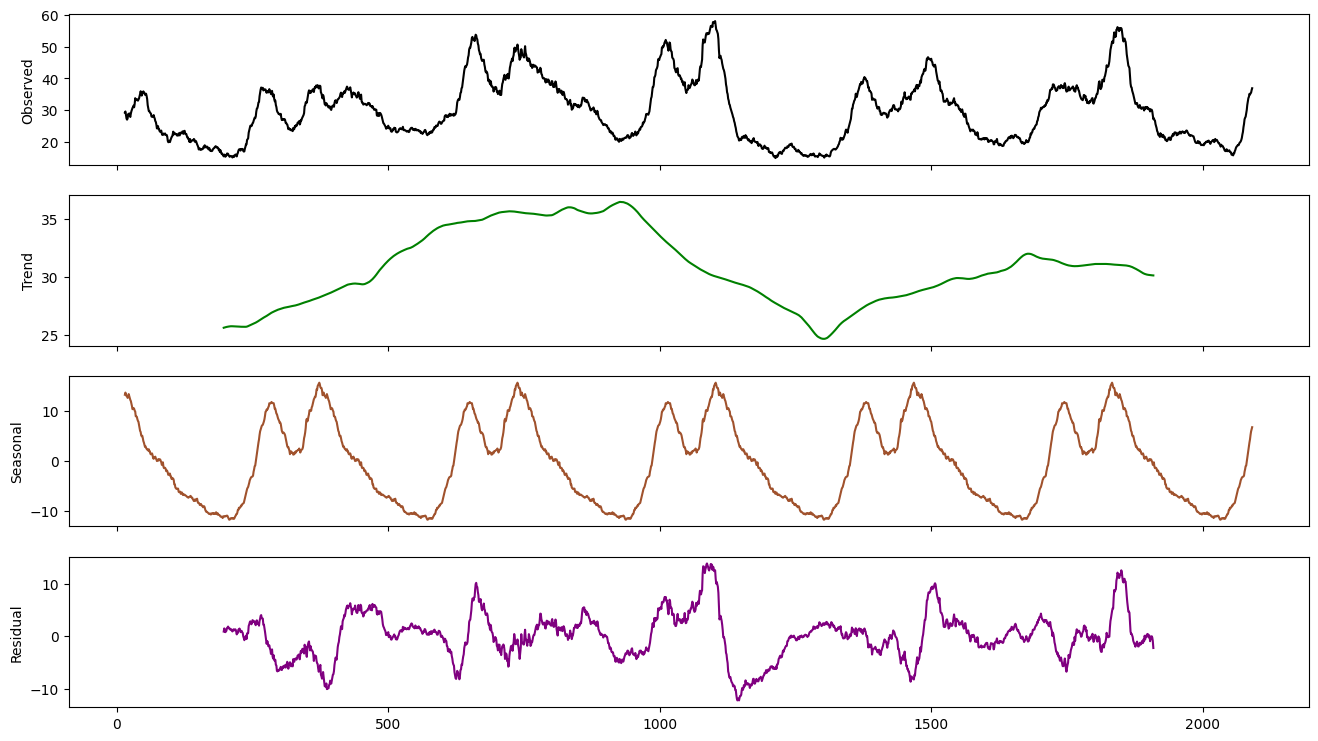

In [10]:
result = seasonal_decompose(dfatc_daily['N02BE'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'black'),
              ('Trend', result.trend, 'green'),
              ('Seasonal', result.seasonal, 'sienna'),
              ('Residual', result.resid, 'purple')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

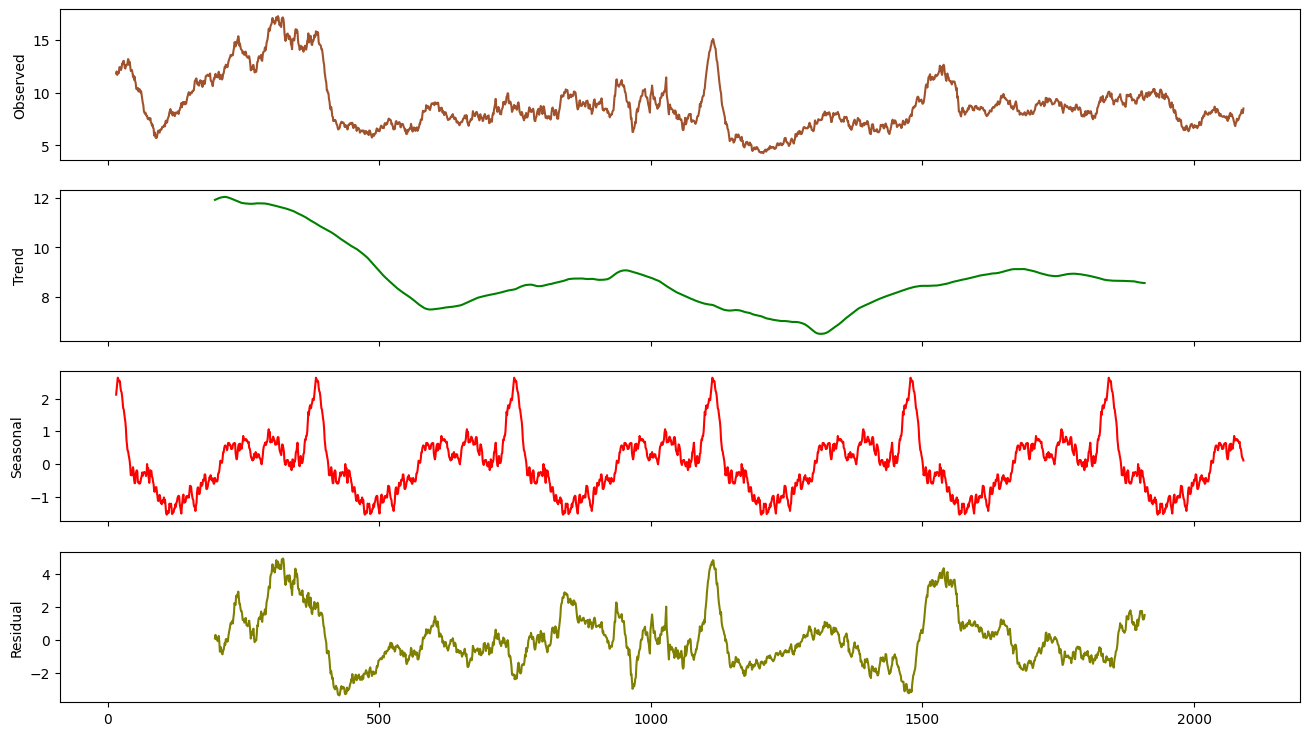

In [11]:
result = seasonal_decompose(dfatc_daily['N05B'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'sienna'),
              ('Trend', result.trend, 'green'),
              ('Seasonal', result.seasonal, 'red'),
              ('Residual', result.resid, 'olive')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

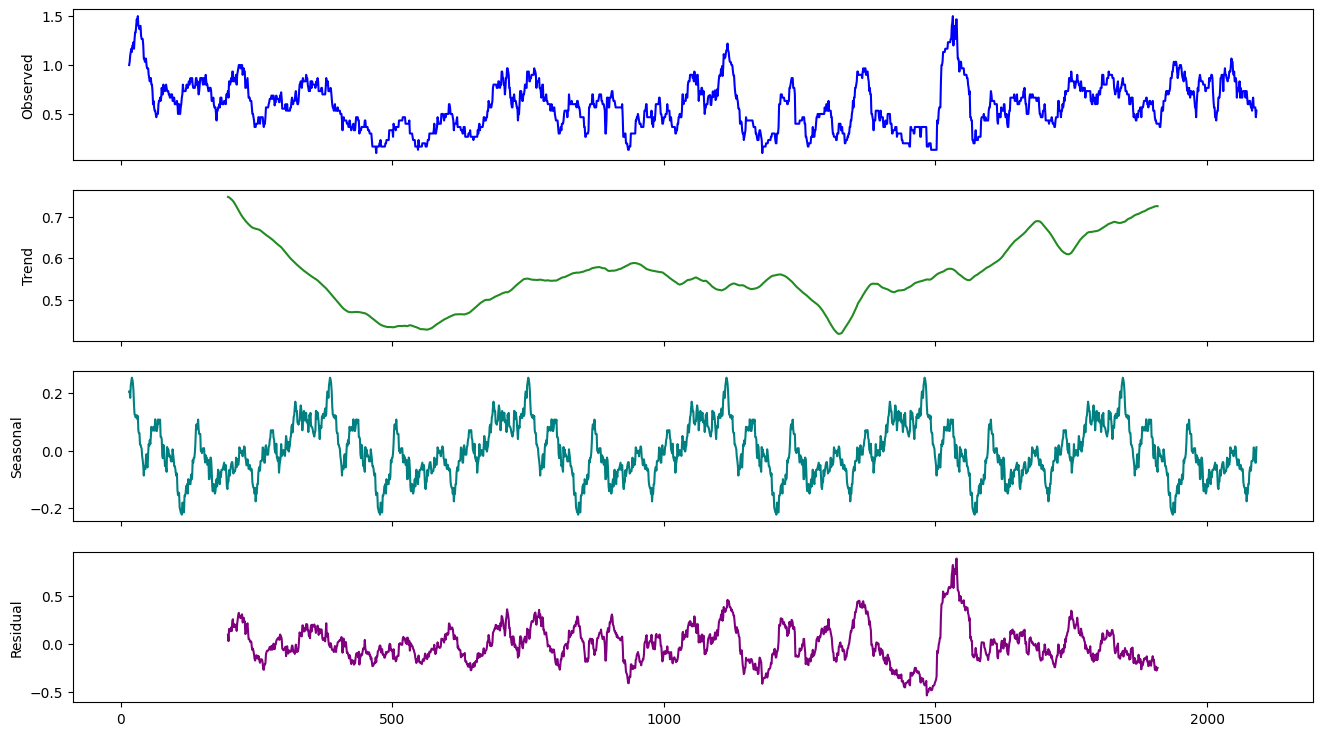

In [12]:
result = seasonal_decompose(dfatc_daily['N05C'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'blue'),
              ('Trend', result.trend, 'forestgreen'),
              ('Seasonal', result.seasonal, 'teal'),
              ('Residual', result.resid, 'purple')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

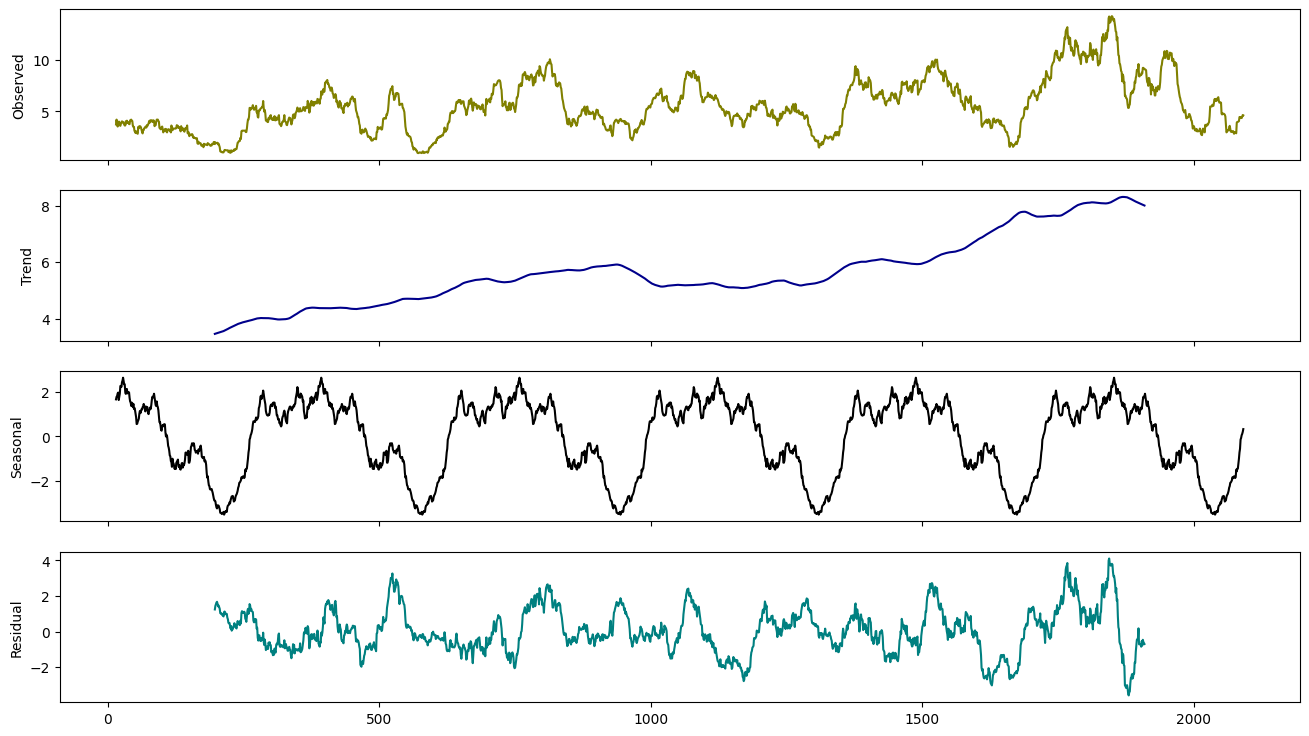

In [13]:
result = seasonal_decompose(dfatc_daily['R03'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'olive'),
              ('Trend', result.trend, 'darkblue'),
              ('Seasonal', result.seasonal, 'black'),
              ('Residual', result.resid, 'teal')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

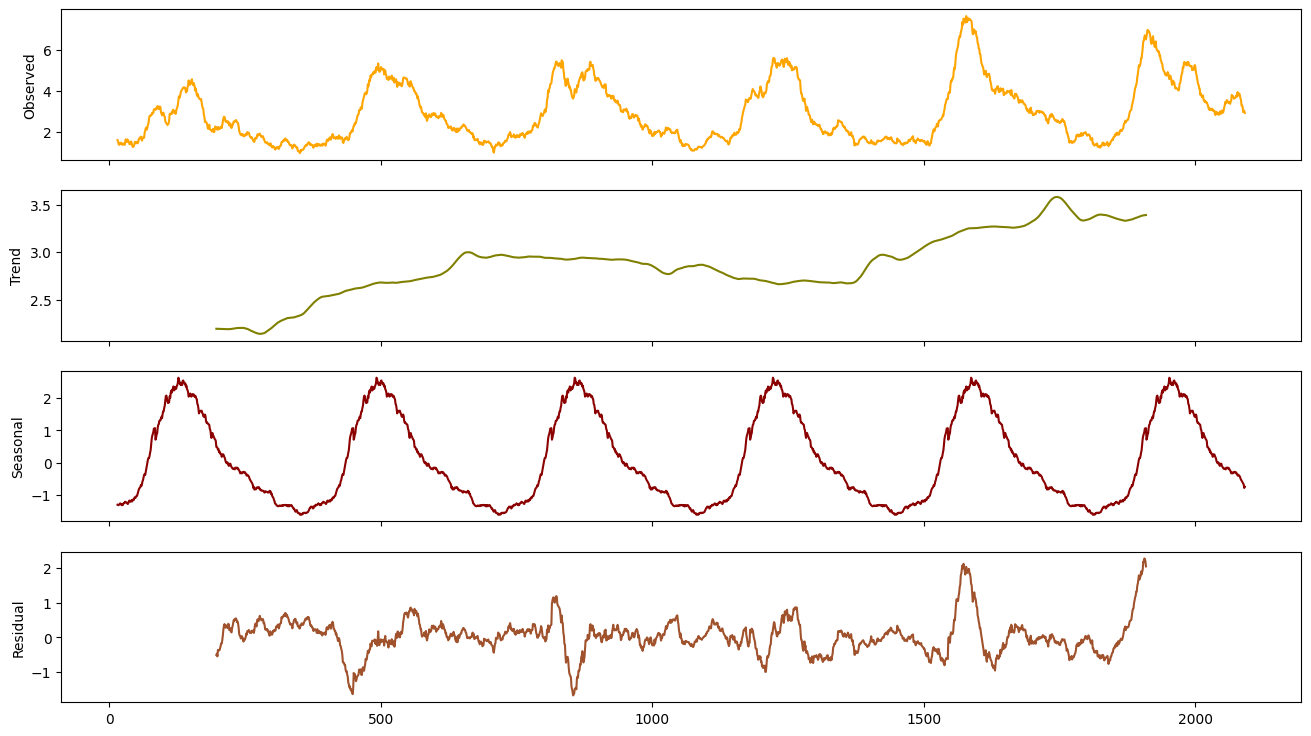

In [14]:
result = seasonal_decompose(dfatc_daily['R06'].rolling(30, center=True).mean().dropna(), period=365)
plt.rcParams["figure.figsize"] = (16, 9)
fig, axes = plt.subplots(4, 1, sharex=True)
components = [('Observed', result.observed, 'orange'),
              ('Trend', result.trend, 'olive'),
              ('Seasonal', result.seasonal, 'darkred'),
              ('Residual', result.resid, 'sienna')]
for ax, (title, data, color) in zip(axes, components):
    data.plot(ax=ax, color=color)
    ax.set_ylabel(title)

plt.show()

In [15]:
df=pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")
columns_to_drop = ['datum']
df = df.drop(columns=columns_to_drop)
for x in df.columns :
    result = seasonal_decompose(df[x], period=52, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    resmean=np.mean(np.abs(res))
    obsmean=np.mean(np.abs(obs))
    perc=resmean*100/obsmean
    print(x+' RESMEAN:'+str(resmean)+', OBSMEAN:'+str(obsmean)+', PERC:'+str(perc)+'%')
    

M01AB RESMEAN:5.26715996284115, OBSMEAN:35.59490833332001, PERC:14.797509558159527%
M01AE RESMEAN:4.319542609675869, OBSMEAN:28.00801458336, PERC:15.422523423856601%
N02BA RESMEAN:3.9228389592521657, OBSMEAN:27.083016, PERC:14.484498178682042%
N02BE RESMEAN:29.534357236963668, OBSMEAN:217.6597028336, PERC:13.569051529737028%
N05B RESMEAN:12.94840305932125, OBSMEAN:61.96614999972, PERC:20.895929566997072%
N05C RESMEAN:2.0384606385595405, OBSMEAN:3.871833333332, PERC:52.648460382081936%
R03 RESMEAN:11.722244335544508, OBSMEAN:40.06845833336, PERC:29.25554119906046%
R06 RESMEAN:4.278758416393868, OBSMEAN:19.744589999960002, PERC:21.67053565762842%


Stationarity analysis


Stationarity of time-series is the property of exhibiting constant statistical properties over time (for example, mean, variance, autocorrelation). It can be visually determined by plotting rolling statistics (rolling means and variances). In stationary time series, the mean of the series, variance of the series and covariance of the i th term and the (i + m) th term should not be a function of time.

In [16]:
df=pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")
from statsmodels.tsa.stattools import adfuller
columns_to_drop = ['datum']
df = df.drop(columns=columns_to_drop)
for x in df.columns:
    dftest = adfuller(df[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -3.700
P-value = 0.022
Critical values :
	1%: -3.9897903649837616 - The data is not stationary with 99% confidence
	5%: -3.425478311521626 - The data is  stationary with 95% confidence
	10%: -3.1358607194990724 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -8.717
P-value = 0.000
Critical values :
	1%: -3.98926783537037 - The data is  stationary with 99% confidence
	5%: -3.425226747185185 - The data is  stationary with 95% confidence
	10%: -3.1357131066666666 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -2.670
P-value = 0.249
Critical values :
	1%: -3.990441532957606 - The data is not stationary with 99% confidence
	5%: -3.425791763669738 - The data is not stationary with 95% confidence
	10%: -3.1360446341572343 - The data is not stationary with 90% confidence
ADF test for N02BE
------------

In [17]:
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")
columns_to_analyze = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
for x in columns_to_analyze:
    print(f" > Is {x} data stationary ?")
    if df[x].isnull().any():
        print(f"Column {x} has NaN values. Filling with mean.")
        df[x] = df[x].fillna(df[x].mean())
    if df[x].isnull().any():
        print(f"Column {x} still has NaN values. Check data.")
        continue
    try:
        dftest = kpss(np.log(df[x]), 'ct')
        
        print("Test statistic = {:.3f}".format(dftest[0]))
        print("P-value = {:.3f}".format(dftest[1]))
        print("Critical values :")
        for k, v in dftest[3].items():
            print("\t{}: {:.3f}".format(k, v))
    except ValueError as e:
        print(f"Error occurred for {x}: {e}")


 > Is M01AB data stationary ?
Test statistic = 0.469
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is M01AE data stationary ?
Test statistic = 0.347
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BA data stationary ?
Test statistic = 0.233
P-value = 0.010
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N02BE data stationary ?
Test statistic = 0.095
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05B data stationary ?
Test statistic = 0.197
P-value = 0.017
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is N05C data stationary ?
Error occurred for N05C: cannot convert float NaN to integer
 > Is R03 data stationary ?
Test statistic = 0.055
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216
 > Is R06 data stationary ?
Test statistic = 0.032
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	

 Regularity analysis

In [18]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    print(x + ': ' + str(ApEn(df[x].values, m=2, r=0.2*np.std(df[x].values))))
 

M01AB: 1.141130089570642
M01AE: 1.166363924596575
N02BA: 1.1370638730125302
N02BE: 1.058024809082593
N05B: 1.074437415034502
N05C: 1.0361887401424648
R03: 1.1847216239035152
R06: 1.031759595747876


Autocorrelation Analysis

Autocorrelation analysis, using the Pearson coefficient, helps predict time series data by measuring the strength of relationships between observations at different time steps. An AutoCorrelation Function (ACF) plot, also known as a correlogram, displays lag values on the x-axis and correlations on the y-axis, ranging from -1 to 1. Confidence intervals, typically set at 95%, form a cone around the correlation values to indicate significant correlations. This analysis assumes data with a normal Gaussian distribution.


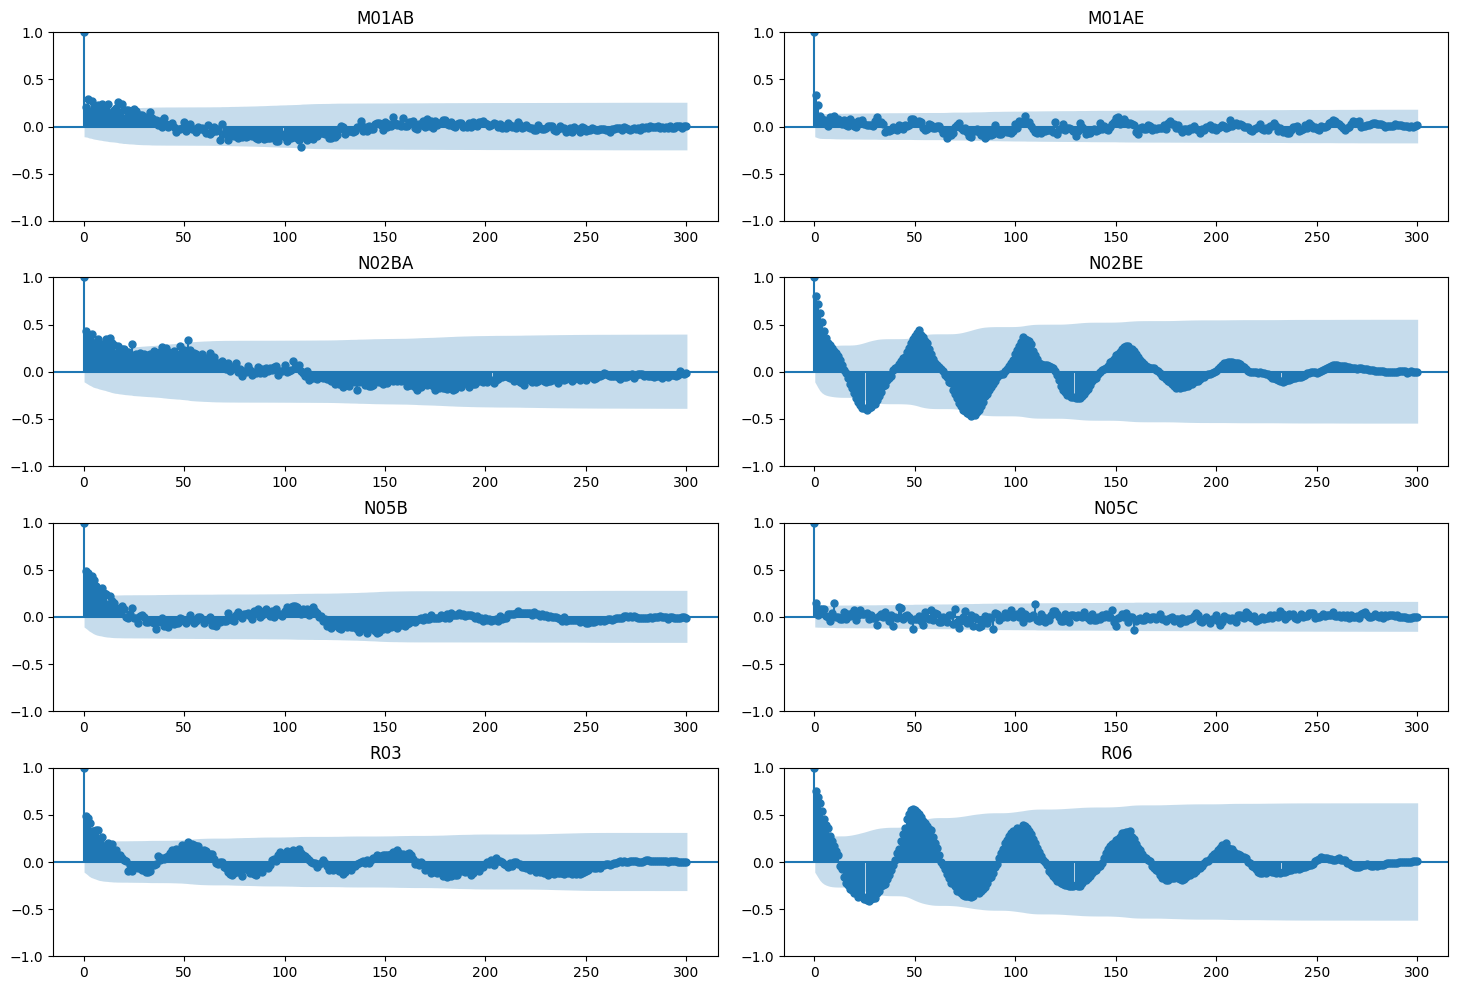

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(df[x], lags=300, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

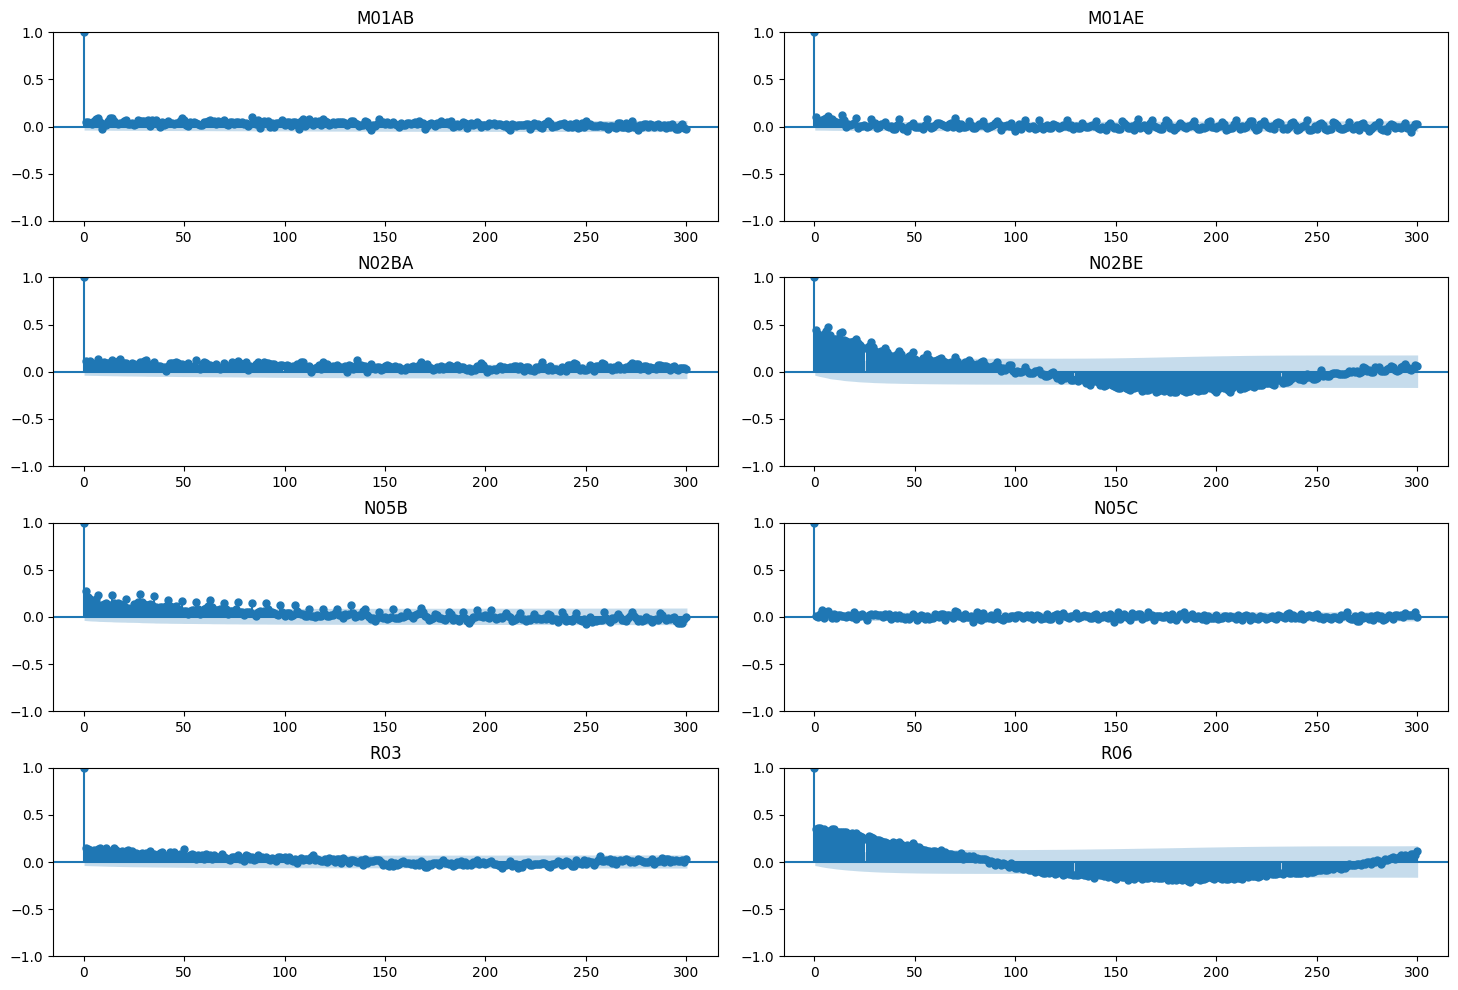

In [20]:

from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesdaily.csv")
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(df[x], lags=300, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

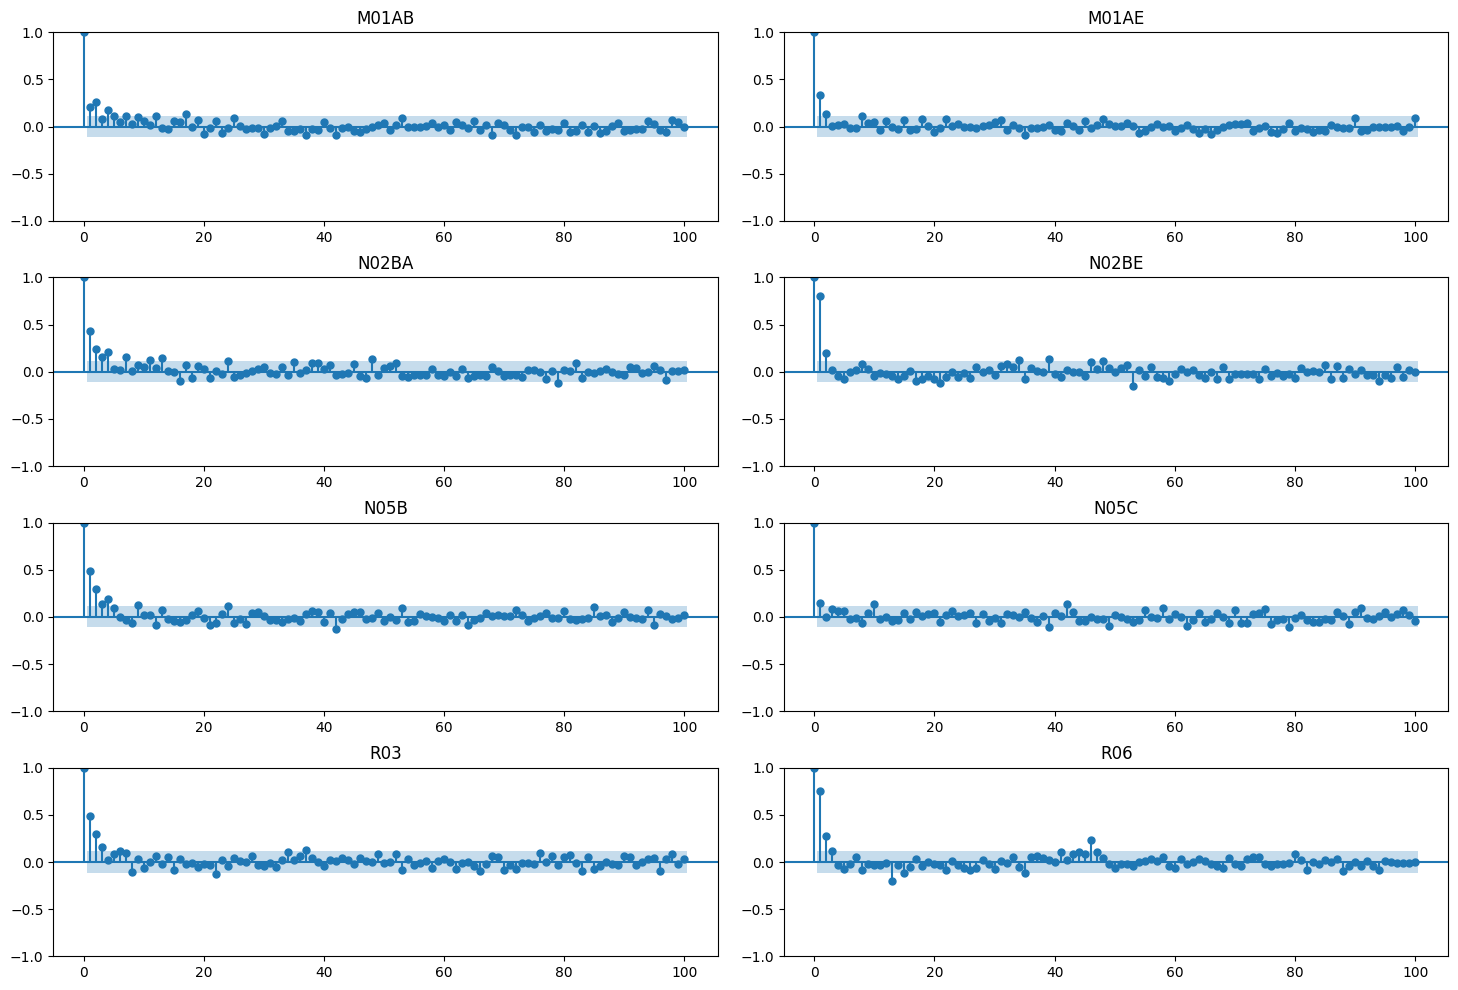

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(df[x], lags=100, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

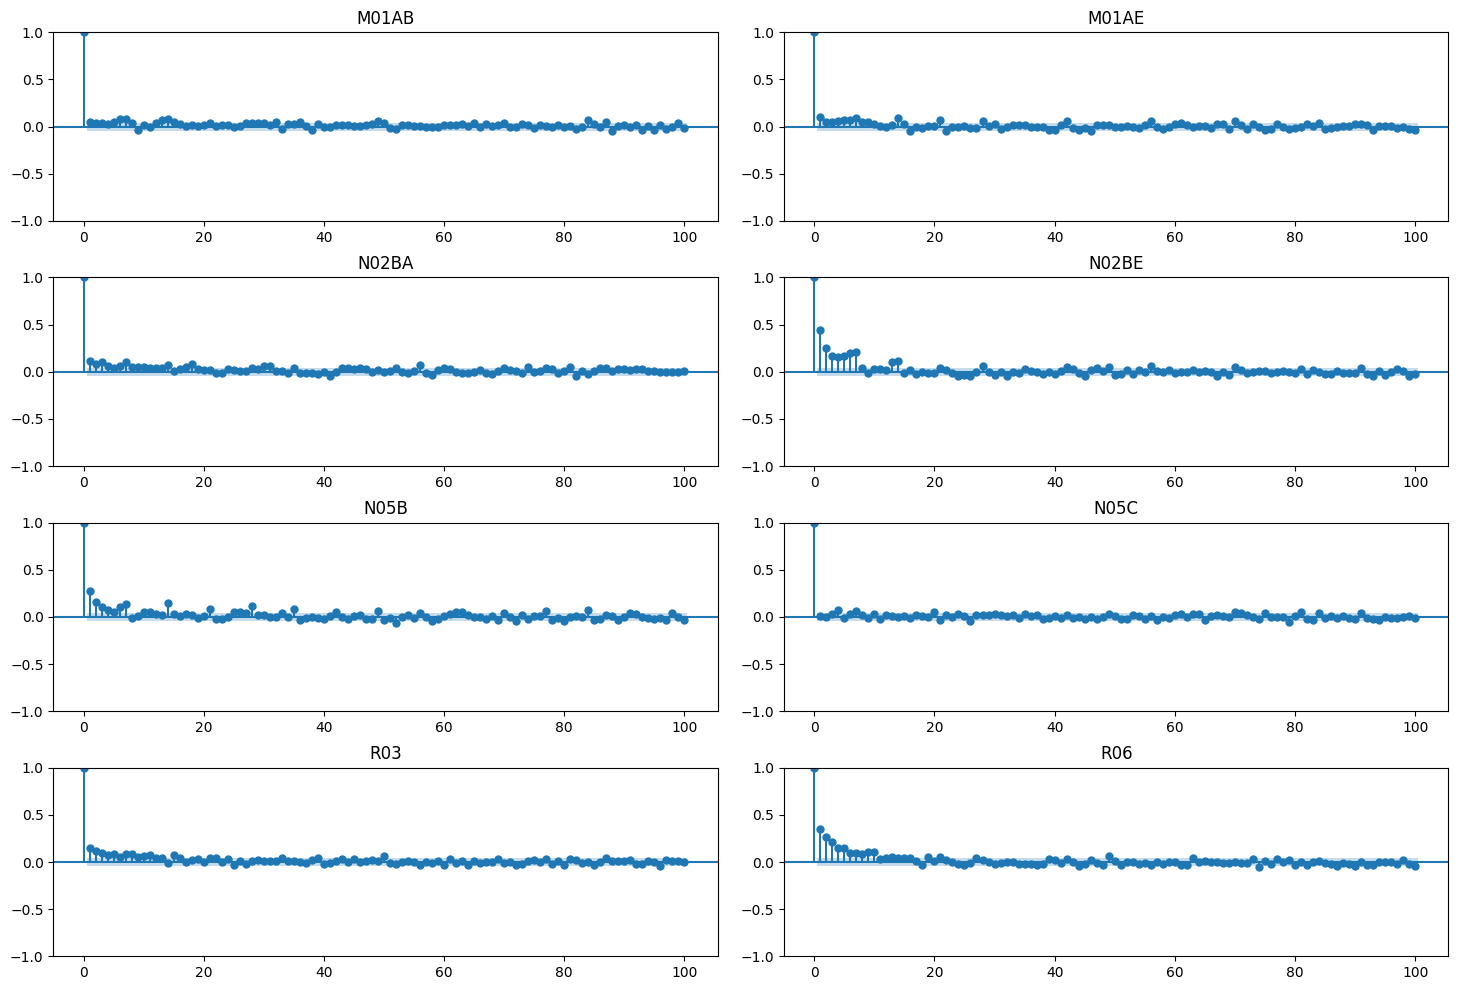

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesdaily.csv")
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(df[x], lags=100, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

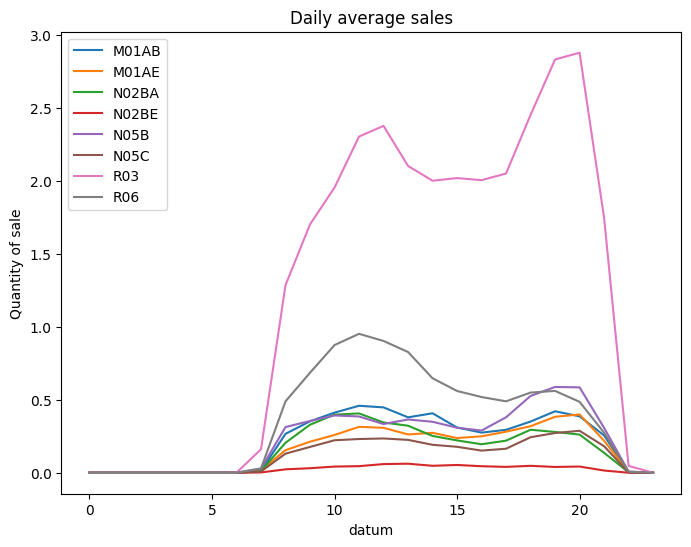

In [23]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\saleshourly.csv") 
df['datum']= pd.to_datetime(df['datum']) 
graph1=df.groupby(df.datum.dt.hour)['M01AB'].mean()
graph2=df.groupby(df.datum.dt.hour)['M01AE'].mean()
graph3=df.groupby(df.datum.dt.hour)['N02BA'].mean()
graph4=df.groupby(df.datum.dt.hour)['N05C'].mean()
graph5=df.groupby(df.datum.dt.hour)['R03'].mean()
graph6=df.groupby(df.datum.dt.hour)['R06'].mean()
graph7=df.groupby(df.datum.dt.hour)['N02BE'].mean()
graph8=df.groupby(df.datum.dt.hour)['N05B'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

graph1.plot(figsize=(8,6))
graph2.plot(figsize=(8,6))
graph3.plot(figsize=(8,6))
graph4.plot(figsize=(8,6))
graph5.plot(figsize=(8,6))
graph6.plot(figsize=(8,6))
graph7.plot(figsize=(8,6))
graph8.plot(figsize=(8,6))

plt.legend(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'],loc='upper left')

plt.show()

Chart with daily sales for different categories of interest is shown below. N02BE and N05B charts, though showing the similar trends, are suppresed because of the larger scale which makes the other illustrations less readable.

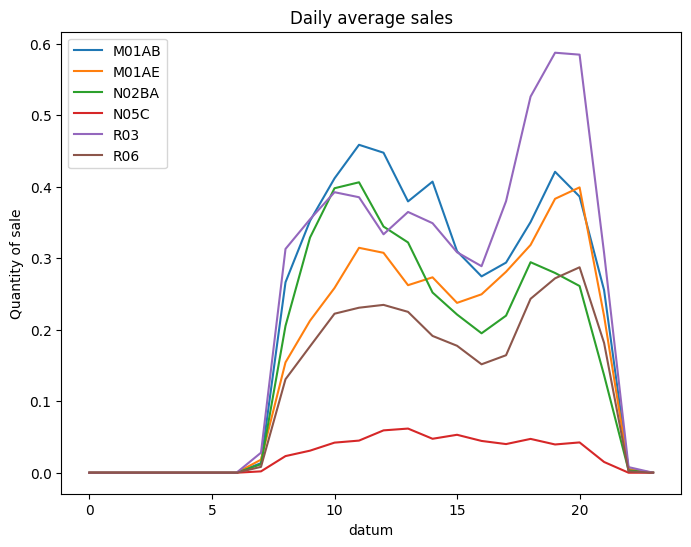

In [24]:
dfatch = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\saleshourly.csv") 

dfatch['datum']= pd.to_datetime(dfatch['datum']) 

grp1=dfatch.groupby(dfatch.datum.dt.hour)['M01AB'].mean()
grp2=dfatch.groupby(dfatch.datum.dt.hour)['M01AE'].mean()
grp3=dfatch.groupby(dfatch.datum.dt.hour)['N02BA'].mean()
grp6=dfatch.groupby(dfatch.datum.dt.hour)['N05C'].mean()
grp7=dfatch.groupby(dfatch.datum.dt.hour)['R03'].mean()
grp8=dfatch.groupby(dfatch.datum.dt.hour)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()


Time Series forecasting

Forecasting models were applied to weekly time-series data (302 rows) using ARIMA, Prophet, and LSTM, with a train-test split method (52 weeks of test data). Performance was measured using MSE and MAPE. Three baseline tests were performed: the average method for long-term forecasting, and naïve and seasonal naïve for rolling forecasts. Short-term forecasts utilized walk-forward validation, updating the training set with each weekly prediction. Long-term forecasts were validated based on the one-year MSE. All MSE metrics were stored in a dataframe for overall results comparison. Rolling forecasting involved five methods (naïve, seasonal naïve, ARIMA, AutoARIMA, Prophet), while long-term forecasting used seven methods (average, ARIMA, AutoARIMA, Prophet, vanilla LSTM, stacked LSTM, bidirectional LSTM).

In [25]:

resultsRolling = {
    'M01AB': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'M01AE': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N02BA': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N02BE': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N05B': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N05C': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'R03': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'R06': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

resultsRollingdf = pd.DataFrame(resultsRolling)
resultsRollingdf.index = [
    'Naive MSE', 'Naive MAPE', 'Seasonal Naive MSE', 'Seasonal Naive MAPE',
    'ARIMA MSE', 'ARIMA MAPE', 'AutoARIMA MSE', 'AutoARIMA MAPE'
]

resultsLongterm = {
    'M01AB': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'M01AE': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N02BA': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N02BE': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N05B': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'N05C': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'R03': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'R06': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}

resultsLongtermdf = pd.DataFrame(resultsLongterm)
resultsLongtermdf.index = [
    'Average MSE', 'Average MAPE', 'ARIMA MSE', 'ARIMA MAPE',
    'AutoARIMA MSE', 'AutoARIMA MAPE', 'Vanilla LSTM MSE', 'Vanilla LSTM MAPE', 'Stacked LSTM MSE', 'Stacked LSTM MAPE',
    'Bidirectional LSTM MSE', 'Bidirectional LSTM MAPE'
]

print(resultsRollingdf)
print(resultsLongtermdf)


                     M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06
Naive MSE              0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
Naive MAPE             0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
Seasonal Naive MSE     0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
Seasonal Naive MAPE    0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
ARIMA MSE              0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
ARIMA MAPE             0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
AutoARIMA MSE          0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
AutoARIMA MAPE         0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
                         M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06
Average MSE                0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
Average MAPE               0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
ARIMA MSE                  0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0
ARIMA MAPE                 0.0    0.0    0.0    0.0   0.0   0.0  0.0  0.0


Baseline forecasting accuracy

In this section, three summaries of the reference benchmarks, specifically the Naïve methods, are provided. First, Naïve forecasting was performed, and the results are presented. Second, the average method was used for forecasting. Finally, a seasonal Naïve forecast was conducted for the series identified as seasonal: N02BE, R03, and R06. Refer to the Theoretical Background section for an explanation of these methods.

Naive forecasting

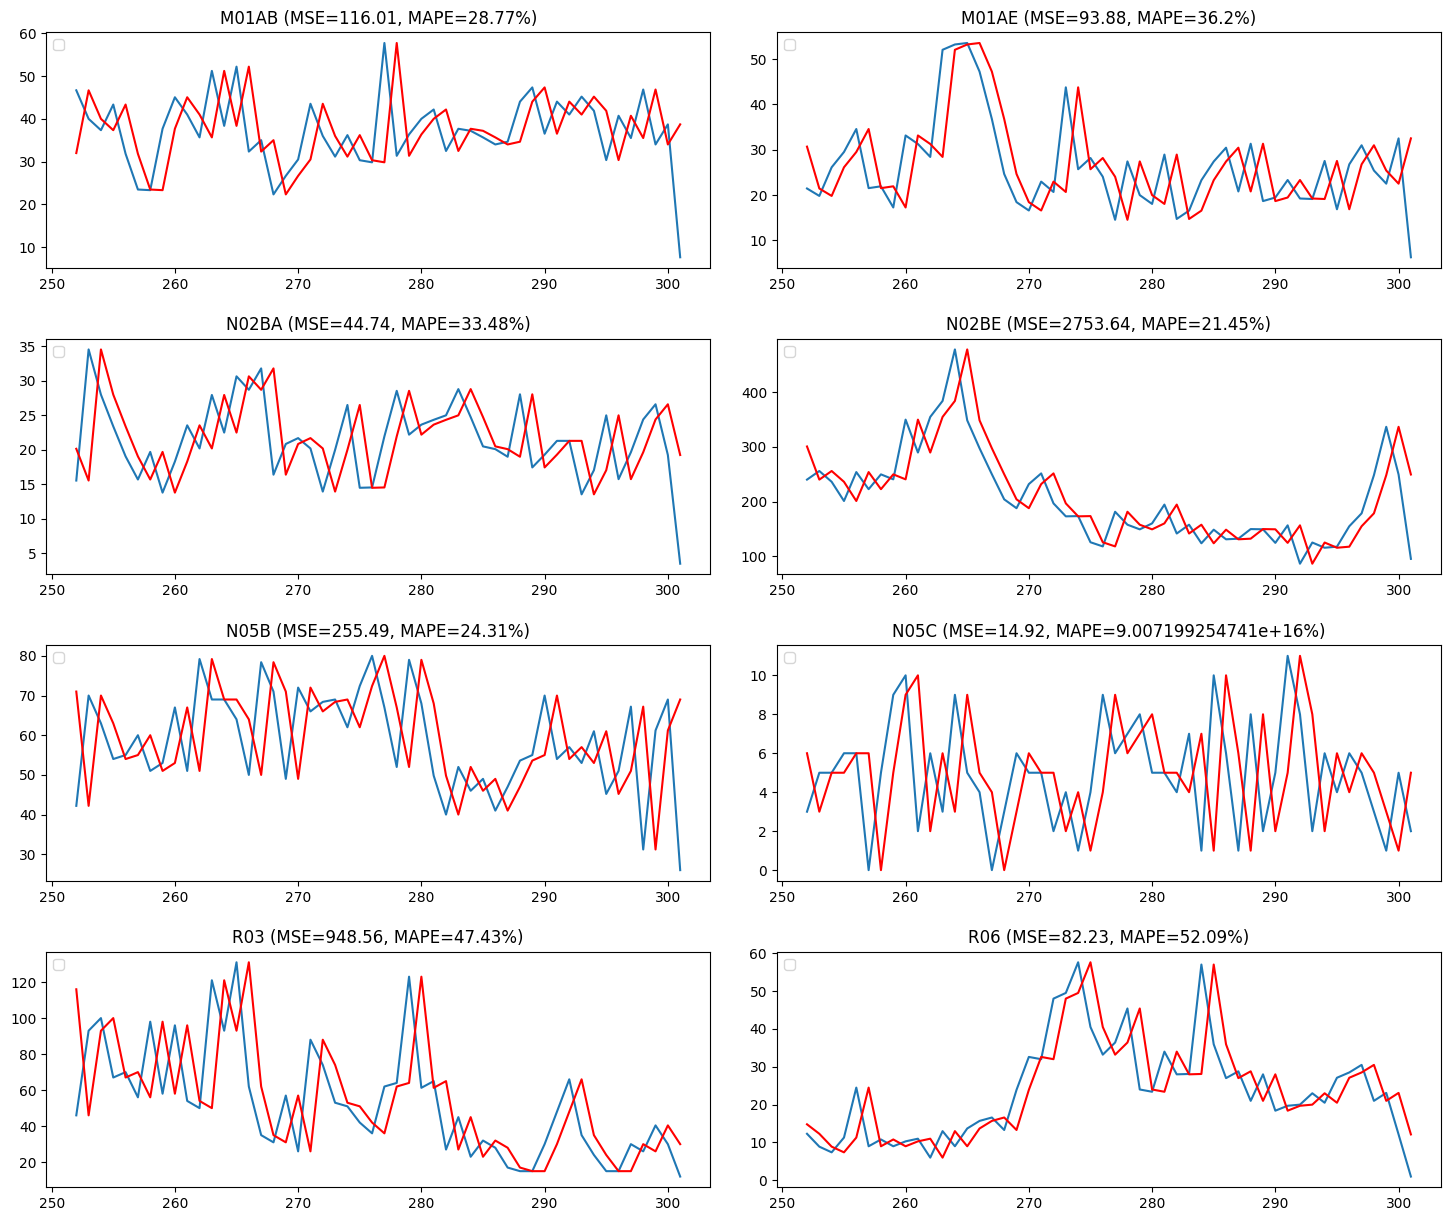

In [26]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 
subplotindex=0
numrows=4
numcols=2
fig,ax=plt.subplots(numrows,numcols,figsize=(18,15))
plt.subplots_adjust(wspace=0.1,hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ds=df[x]
    dataframe = concat([ds.shift(1), ds], axis=1)
    dataframe.columns = ['t+1', 't-1']
    size = len(dataframe)-50
    X=dataframe['t-1']
    Y=dataframe['t+1']
    test, predictions = X[size:len(X)], Y[size:len(Y)]
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Naive MSE',x]=error
    resultsRollingdf.loc['Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror*100,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

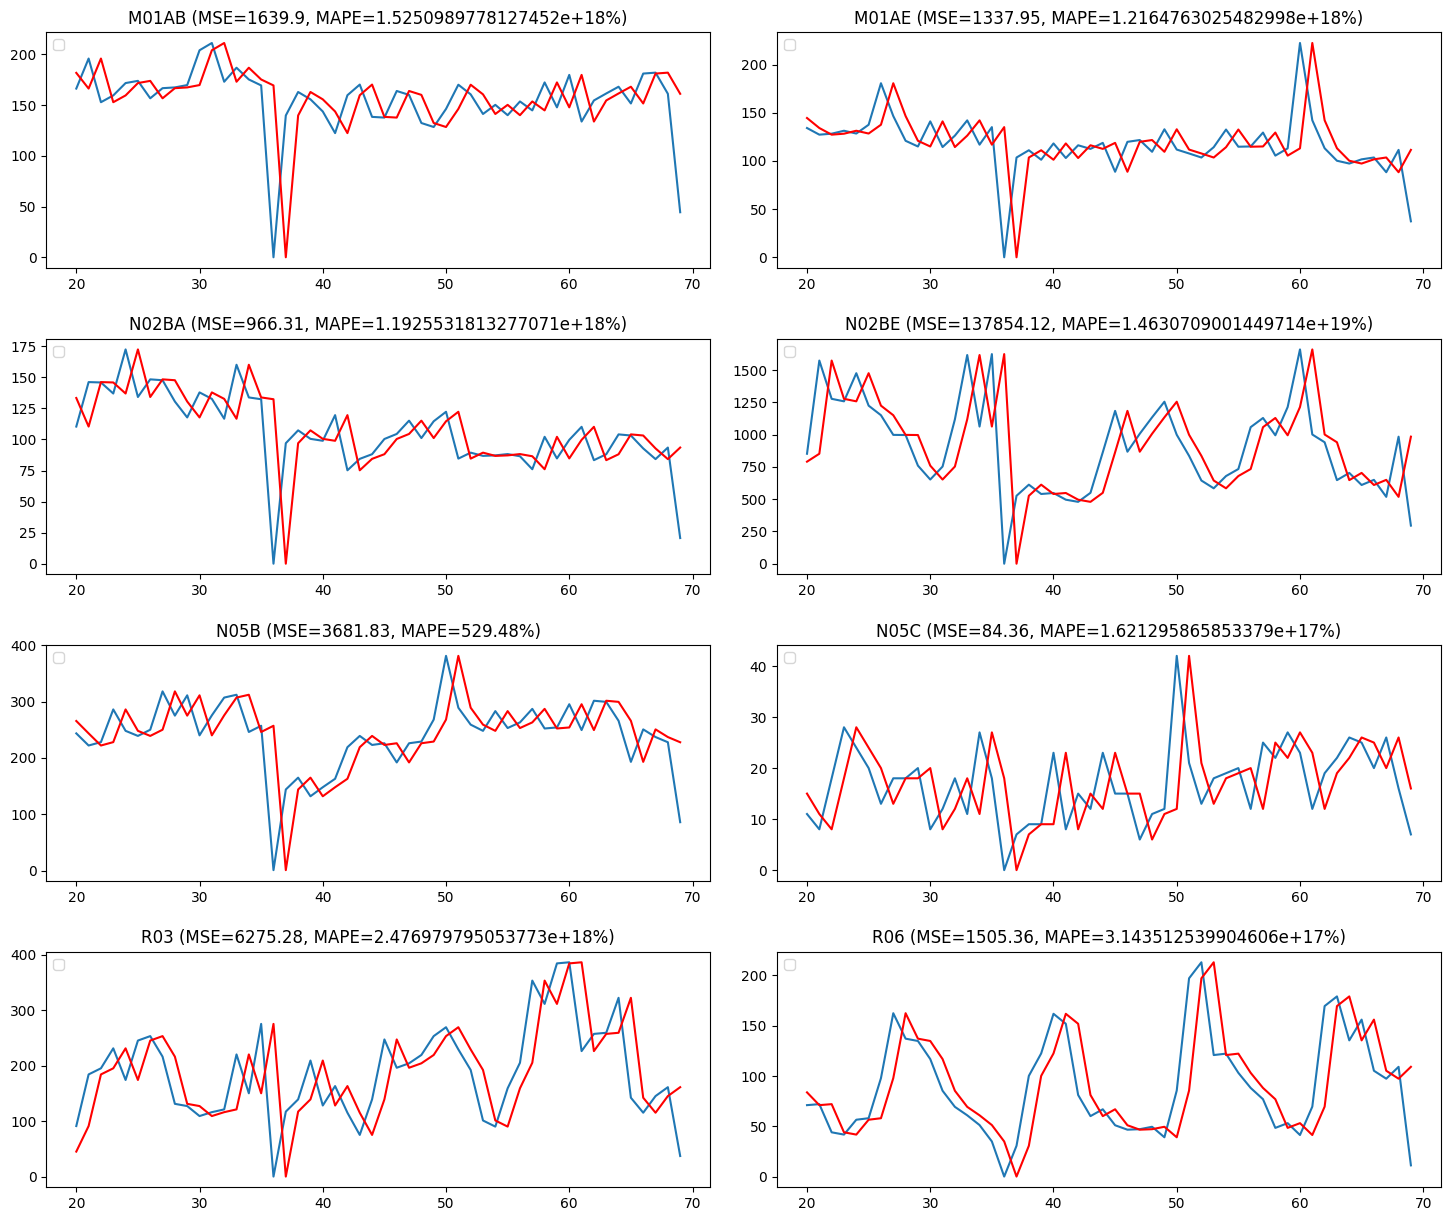

In [27]:
#Sales on Monthly
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesmonthly.csv") 
subplotindex=0
numrows=4
numcols=2
fig,ax=plt.subplots(numrows,numcols,figsize=(18,15))
plt.subplots_adjust(wspace=0.1,hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ds=df[x]
    dataframe = concat([ds.shift(1), ds], axis=1)
    dataframe.columns = ['t+1', 't-1']
    size = len(dataframe)-50
    X=dataframe['t-1']
    Y=dataframe['t+1']
    test, predictions = X[size:len(X)], Y[size:len(Y)]
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Naive MSE',x]=error
    resultsRollingdf.loc['Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror*100,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Average method forecasting

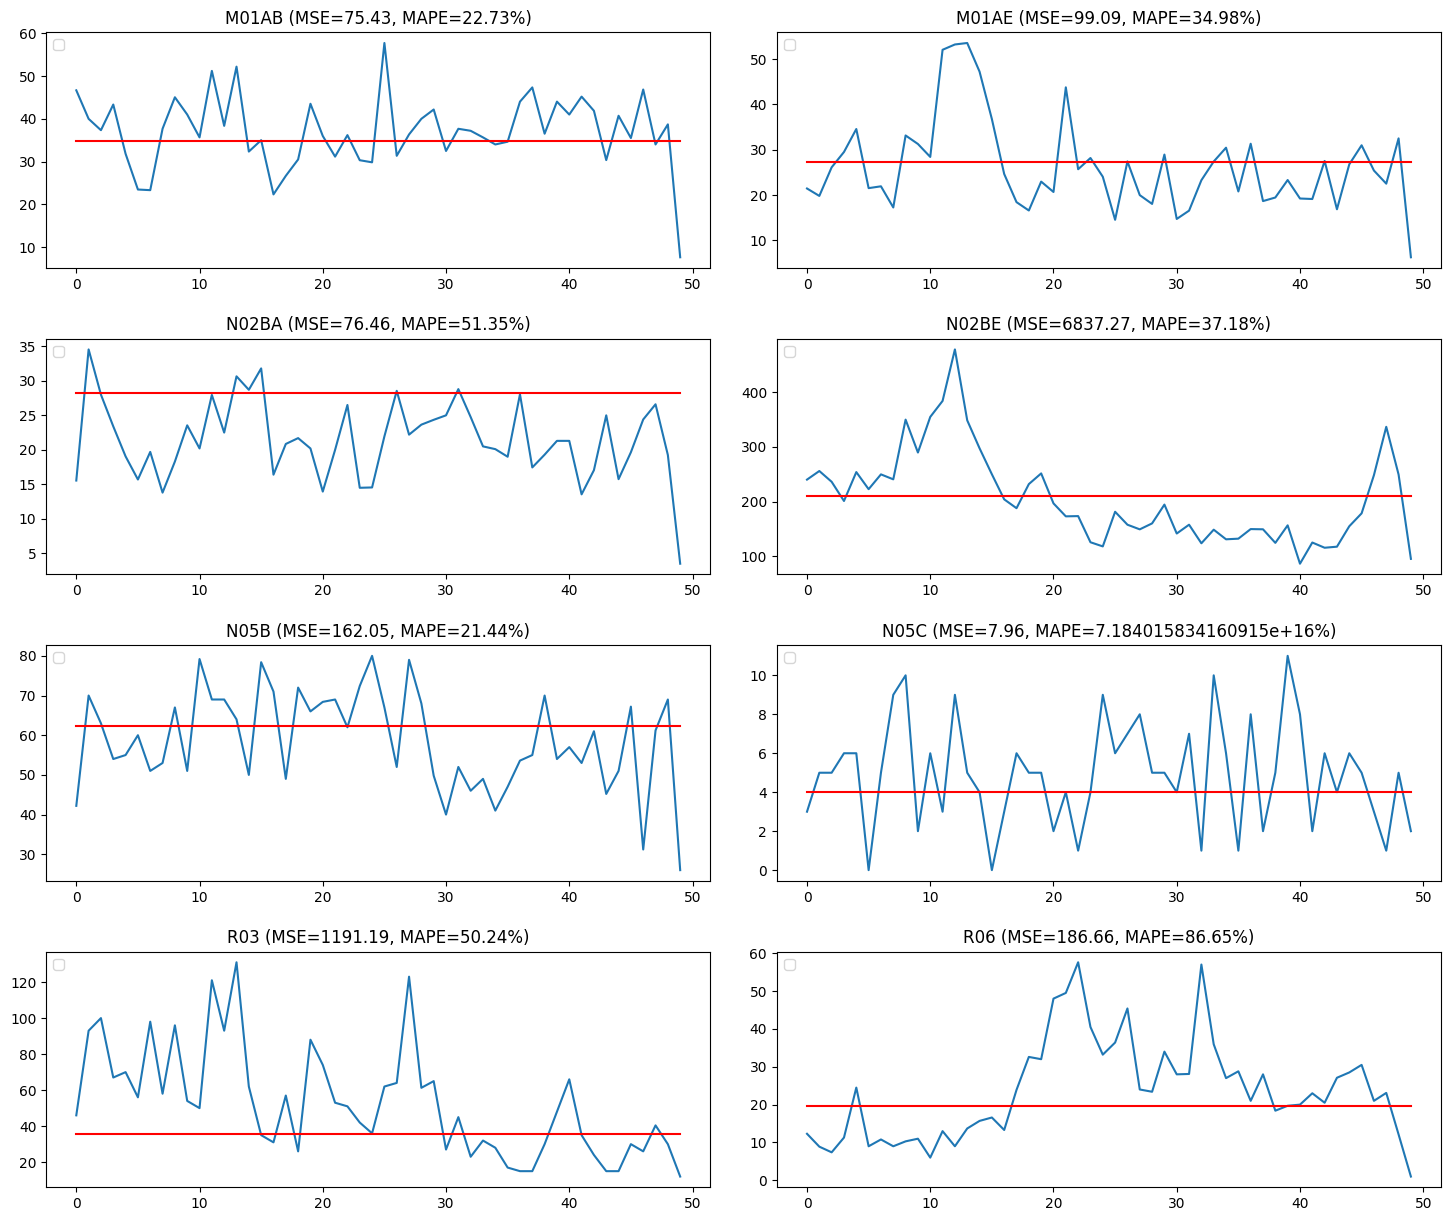

In [28]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-50
    test = X[size:len(X)] 
    mean = np.mean(X[0:size])
    predictions = np.full(50,mean)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['Average MSE',x]=error
    resultsLongtermdf.loc['Average MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror*100,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

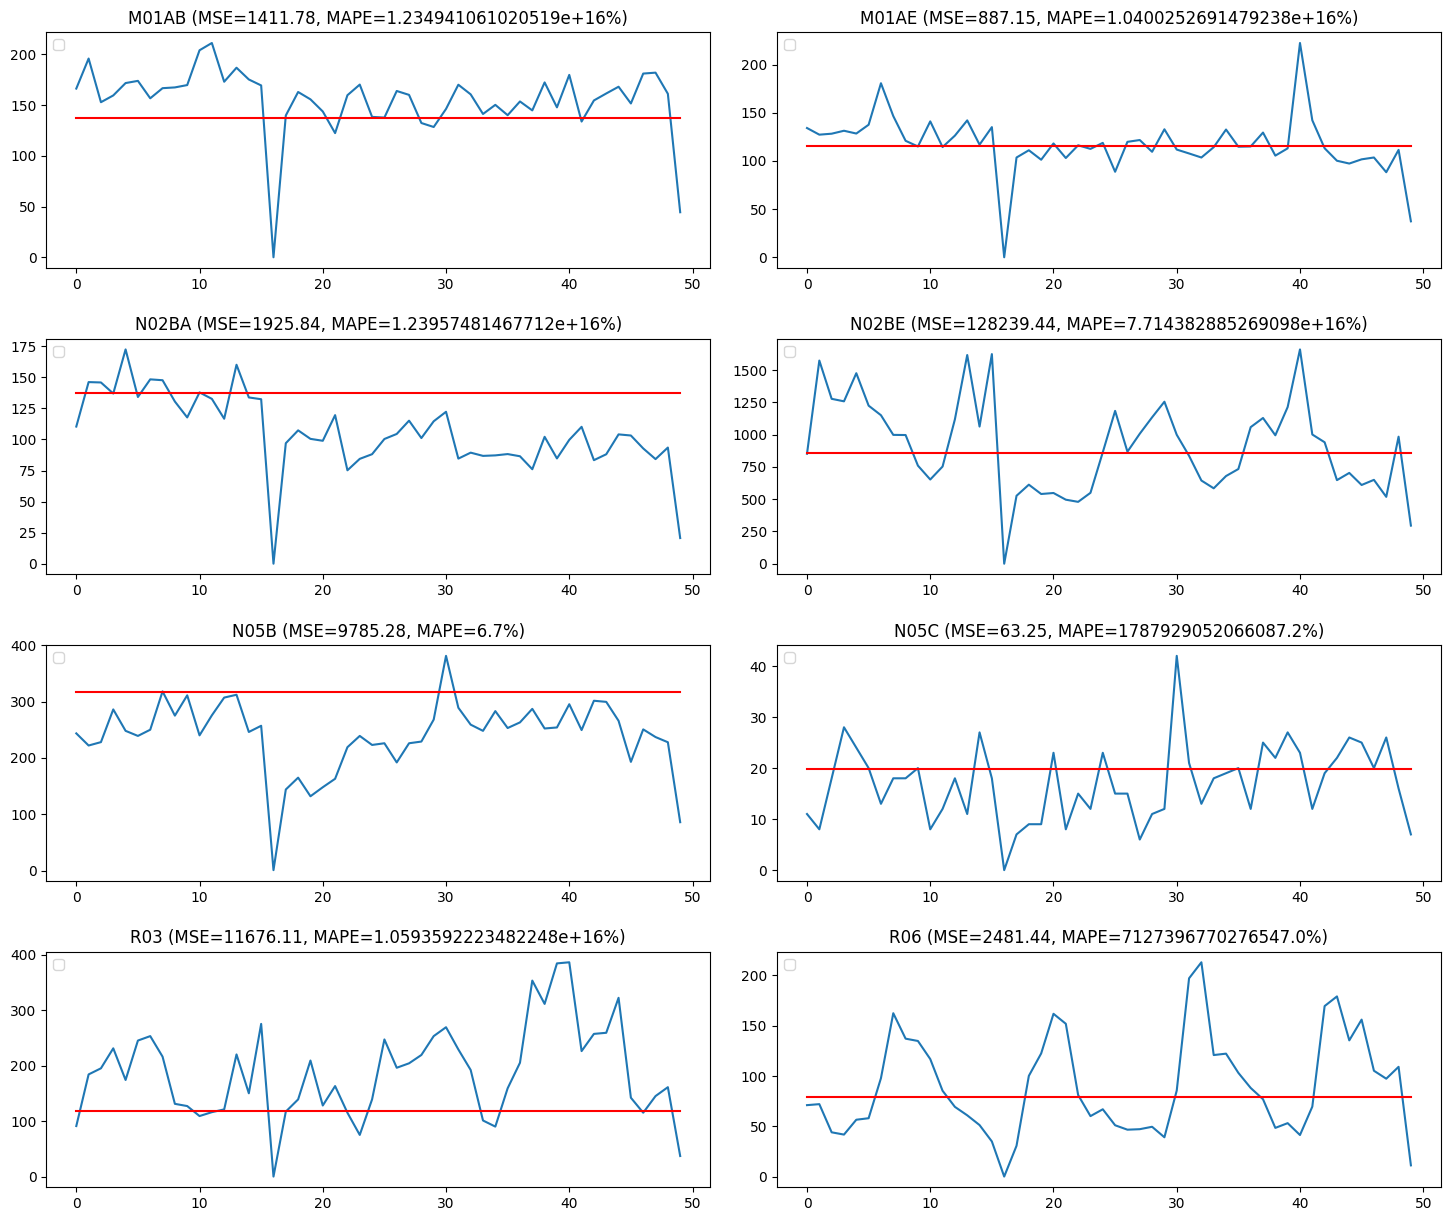

In [29]:
# Sales on Monthly
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesmonthly.csv") 

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-50
    test = X[size:len(X)] 
    mean = np.mean(X[0:size])
    predictions = np.full(50,mean)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['Average MSE',x]=error
    resultsLongtermdf.loc['Average MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Seasonal Naïve forecasting


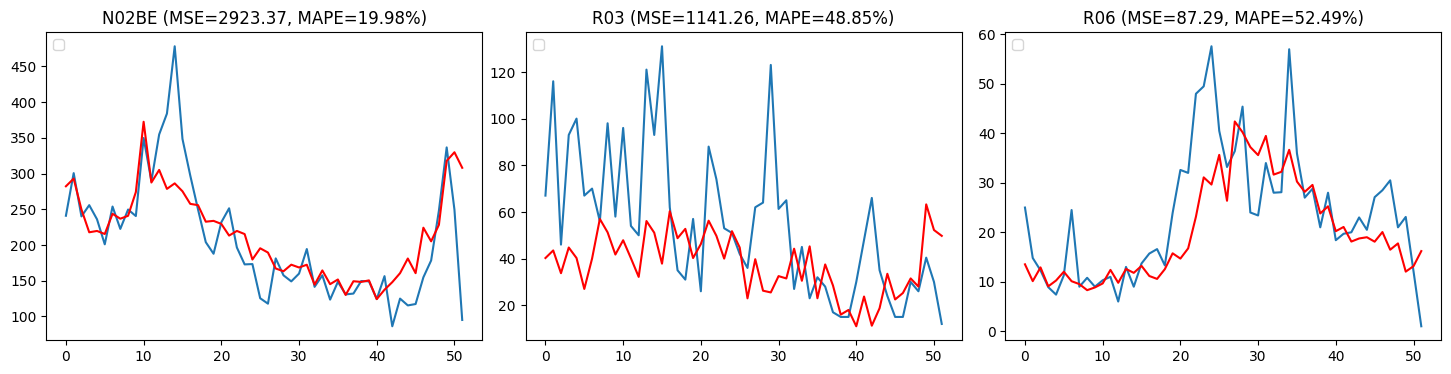

In [30]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 
subplotindex=0
numrows=1
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,4))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['N02BE','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-52
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*52)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Seasonal Naive MSE',x]=error
    resultsRollingdf.loc['Seasonal Naive MAPE',x]=perror
    ax[colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror*100,2)) +'%)')
    ax[colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[colindex].plot(test)
    ax[colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    


In [31]:
import statsmodels
print(statsmodels.__version__)


0.14.2


 ARIMA Forecasting 

The ARIMA method was utilized for short-term (rolling forecast) and long-term forecasting based on test data. Before each forecast, the hyper-parameters (p, d, q) of the ARIMA model were optimized. Using the optimal parameters, both rolling forecasts and long-term forecasts were conducted. The Seasonal ARIMA (SARIMA) method was tested using the Auto-ARIMA implementation. This implementation includes a built-in stepwise optimizer that selects the optimal set of parameters (p, d, q for non-seasonal and p, d, q, P, D, Q for seasonal series, specifically N02BE, R03, and R06).

In [32]:
import statsmodels.api as sm
np.random.seed(0)
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 
warnings.filterwarnings("ignore")
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    resDiff = sm.tsa.arma_order_select_ic(df[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')


ARMA(p,q,M01AB) = (3, 3) is the best.
ARMA(p,q,M01AE) = (2, 0) is the best.
ARMA(p,q,N02BA) = (3, 3) is the best.
ARMA(p,q,N02BE) = (2, 2) is the best.
ARMA(p,q,N05B) = (4, 3) is the best.
ARMA(p,q,N05C) = (3, 3) is the best.
ARMA(p,q,R03) = (1, 1) is the best.
ARMA(p,q,R06) = (2, 2) is the best.


However, AIC is not employed to measure the accuracy of the forecasting methods in this research. Instead, mean squared error (MSE) is utilized. Therefore, a grid search optimization method was applied, where various combinations of the hyper-parameters were tested to calculate MSE, and the combination that resulted in the lowest MSE was chosen as optimal. Grid search optimization is performed for both rolling and long-term forecasting approaches.

In [ ]:
#Grid search optimization for rolling forecast produced the following best combinations of the hyper-parameters:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA %s MSE=%.2f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)


In [ ]:
#Grid search optimization for long-term forecast produced the following best combinations of the hyper-parameters:

# Function to evaluate an ARIMA model
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) - 50)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

Rolling forecasting with ARIMA model

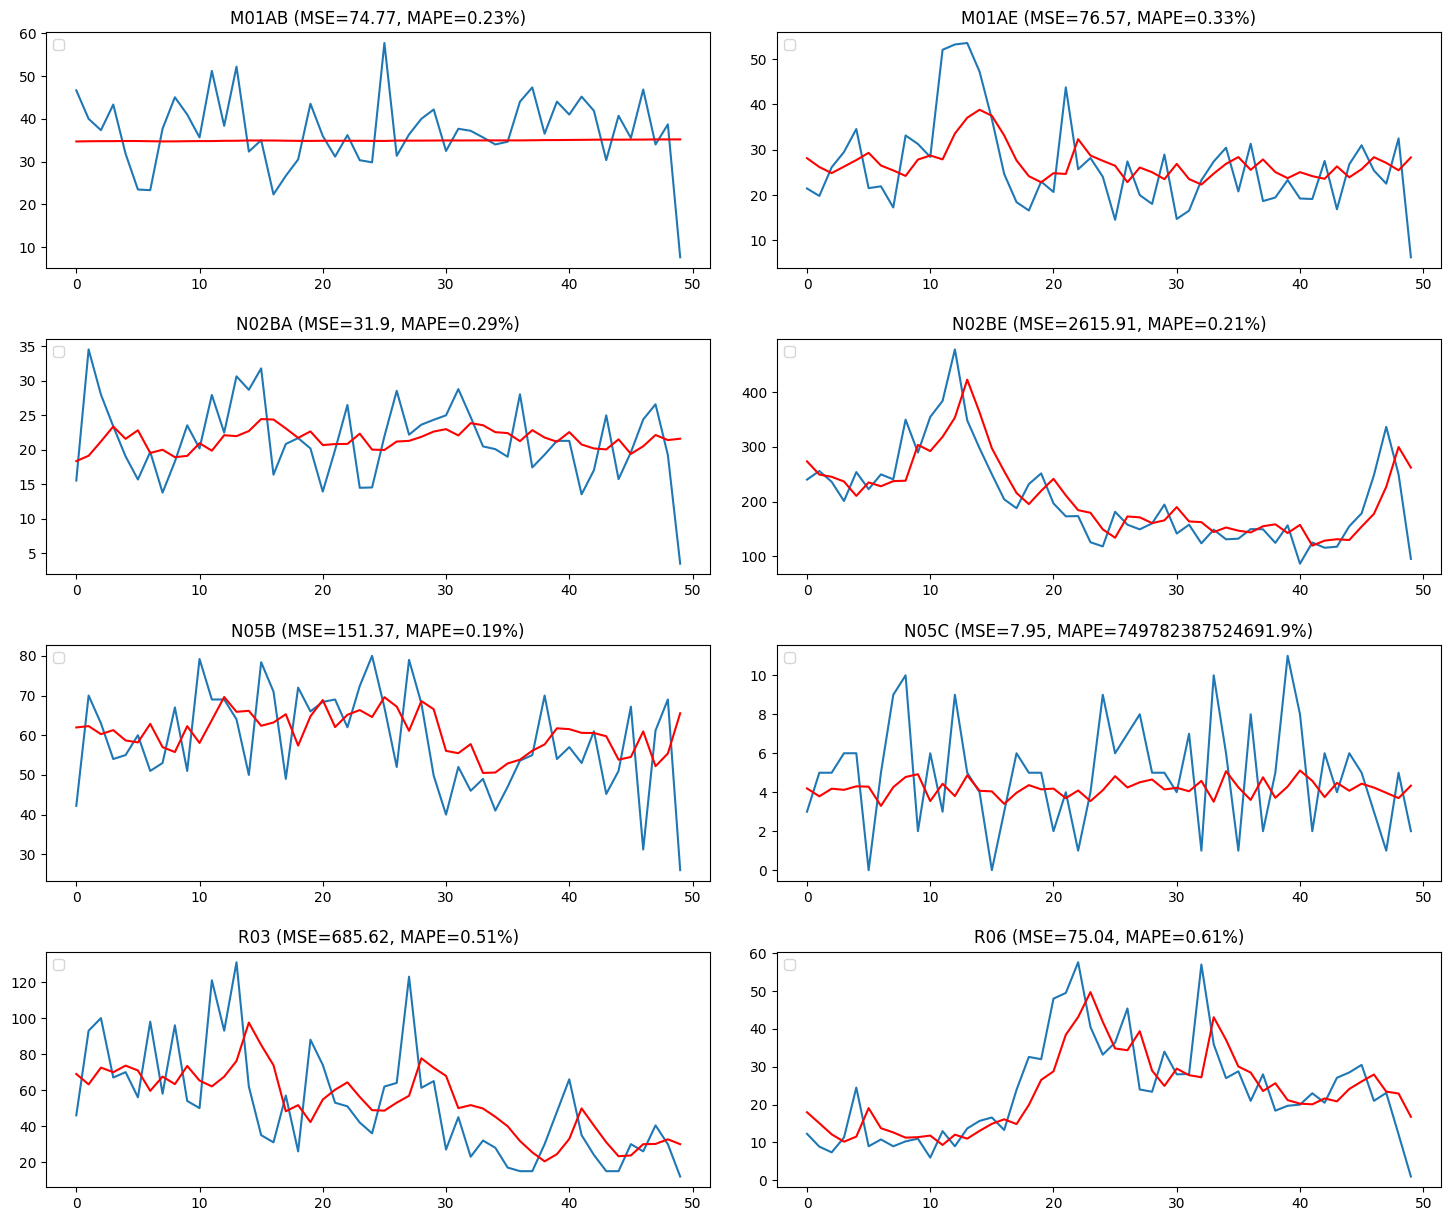

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import warnings

# Load the data
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv")

# Define models
M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':2,'d':0,'q':0}
N02BA= {'series':'N02BA','p':5,'d':1,'q':1}
N02BE= {'series':'N02BE','p':2,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':5}
N05C= {'series':'N05C','p':0,'d':0,'q':1}
R03= {'series':'R03','p':5,'d':1,'q':1}
R06= {'series':'R06','p':1,'d':0,'q':1}

# Initialize plot settings
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Ignore warnings
warnings.filterwarnings("ignore")

# Prepare results dataframe
resultsRollingdf = pd.DataFrame()

# Loop through each model
for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x['series']].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(x['p'],x['d'],x['q']))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['ARIMA MSE',x['series']]=error
    resultsRollingdf.loc['ARIMA MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1

plt.show()


 Long-term forecasting with ARIMA model

In [ ]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':4,'d':0,'q':4}
N02BA= {'series':'N02BA','p':0,'d':0,'q':0}
N02BE= {'series':'N02BE','p':0,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':0}
N05C= {'series':'N05C','p':2,'d':0,'q':2}
R03= {'series':'R03','p':0,'d':0,'q':0}
R06= {'series':'R06','p':2,'d':0,'q':2}

subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x['series']].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    model = ARIMA(train, order=(x['p'],x['d'],x['q']))
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, forecast)
    resultsLongtermdf.loc['ARIMA MSE',x['series']]=error
    resultsLongtermdf.loc['ARIMA MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

 Rolling forecasting with Auto-ARIMA model

In [ ]:
from pyramid.arima import auto_arima

df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 
subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N05B','N05C']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['AutoARIMA MSE',x]=error
    resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Long-term forecasting with Auto-ARIMA model

In [ ]:
from pyramid.arima import auto_arima

df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    if (x=='N02BE' or x=='R03' or x=='R06'):
        model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    else:
        model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
    model_fit = model.fit(train)
    forecast = model_fit.predict(n_periods=len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['AutoARIMA MSE',x]=error
    resultsLongtermdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

 Forecasting with LSTM

Long-term forecasting validation was conducted using three different LSTM configurations: Vanilla LSTM, Stacked LSTM, and Bi-directional LSTM. The activation function used was ReLU, the optimizer was Adam, and the loss function was Mean Squared Error. The optimal results were obtained by training the models for 400 epochs. Prior to training, all data were standardized (rescaled to the interval -1 to 1) and converted to a format suitable for a supervised learning problem.

The number of past observations tested in input sequences was either 10 or 5. For series with greater variance and randomness (N05B and N05C) and using the simpler Vanilla LSTM model, 10 past observations yielded better forecasting accuracy. In all other cases, 5 past observations were used. This parameter was subsequently adopted.

To ensure reproducible results in LSTM forecasting, the following values were fixed: seed value, 'PYTHONHASHSEED' environment variable, and the built-in pseudo-random generators for Python, numpy, and TensorFlow. A new global TensorFlow session was also configured.

In [ ]:
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

Components required for forecasting with LSTM are then imported. Function split_sequence for transforming time-series data to data for supervised machine learning problem is provided, including constants, such as number of previous steps to take into account.

In [42]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

size = int(len(df) - 50)
n_steps=5
n_features = 1

Long-term forecasting with Vanilla LSTM configuration

In [ ]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Vanilla LSTM MSE',x]=error
    resultsLongtermdf.loc['Vanilla LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

Long-term forecasting with Stacked LSTM model

In [ ]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Stacked LSTM MSE',x]=error
    resultsLongtermdf.loc['Stacked LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()


Long-term forecasting with Bidirectional LSTM

In [ ]:
df = pd.read_csv("C:\\Users\\Srinivas\\Downloads\\salesweekly.csv") 

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)

    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Bidirectional LSTM MSE',x]=error
    resultsLongtermdf.loc['Bidirectional LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()


Conclusion

For rolling forecast, ARIMA method (Auto-ARIMA for series with seasonal character) outperforms Prophet and is considered as a best candidate for short-term sales forecasting. All methods in all cases (with exception of Prophet N02BE) outperform reference benchmarks - Naive and Seasonal Naive forecasts.

In [ ]:
from IPython.display import display, HTML
display(HTML(resultsRollingdf.to_html()))

For long-term forecasting, Prophet and LSTM models have shown significantly better performance then benchmarks in the time series with seasonality. In all cases, even without optimization, LSTM models have achieved competitive performance.

In [ ]:
from IPython.display import display, HTML
display(HTML(resultsLongtermdf.to_html()))

To conclude, the time-series analyses and forecasts have yielded valuable insights and recommendations for the pharmacy. Analyzing daily, weekly, and annual seasonality was beneficial for identifying periods suitable for special sales and marketing campaigns, except for the N05B and N05C drug categories, which showed no significant patterns. The forecasts outperformed Naïve methods and were within acceptable intervals for long-term planning.

Future improvements could include expanding to multivariate time series forecasting and incorporating explanatory variables, such as:

- **Weather data:** Changes in atmospheric pressure could affect sales of antirheumatic drugs (M01AB and M01AE). Extreme weather conditions, like heavy rain and blizzards, may explain sudden declines in all categories.
- **Drug prices:** Sales spikes often result from short-term discounts. Including this data could enhance what-if forecasting for marketing campaigns.
- **Pension payout dates:** Sales increase on state pension payout dates.
- **National holidays:** These non-working days have seasonal patterns similar to Sundays, disrupting daily sales.

Further work should involve increasing the data volume, exploring additional accuracy metrics, optimizing LSTM model hyper-parameters, and testing new architectures like CNN LSTM and ConvLSTM. The key to significant improvement lies in adopting multivariate time series forecasting to reduce model uncertainty.